In [1]:
# Library imports
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from labellines import labelLines

import constants as c
from aRead import readAREPO, readSinks, readImage

matplotlib.rcParams['figure.dpi'] = 150

## Whole Cloud Image

In [2]:
# Load in the image files and snapshots
image1 = readImage("../apricot/wholeCloudUV1.dat")
image10 = readImage("../apricot/wholeCloudUV10.dat")
image100 = readImage("../apricot/wholeCloudUV100.dat")
image1000 = readImage("../apricot/wholeCloudUV1000.dat")

zoom1 = readImage("../apricot/CMFimages3/column_cloudUV1_041.dat")
zoom10 = readImage("../apricot/CMFimages3/column_cloudUV10_042.dat")
zoom100 = readImage("../apricot/CMFimages3/column_cloudUV100_077.dat")
zoom1000 = readImage("../apricot/CMFimages3/column_cloudUV1000_072.dat")

uv1 = readSinks(1, "/scratch/c.c1922522/bigClouds/UV1/sink_snap_041")
uv10 = readSinks(1, "/scratch/c.c1922522/bigClouds/UV10/sink_snap_042")
uv100 = readSinks(1, "/scratch/c.c1922522/bigClouds/UV100/sink_snap_077")
uv1000 = readSinks(1, "/scratch/c.c1922522/bigClouds/UV1000/sink_snap_072")

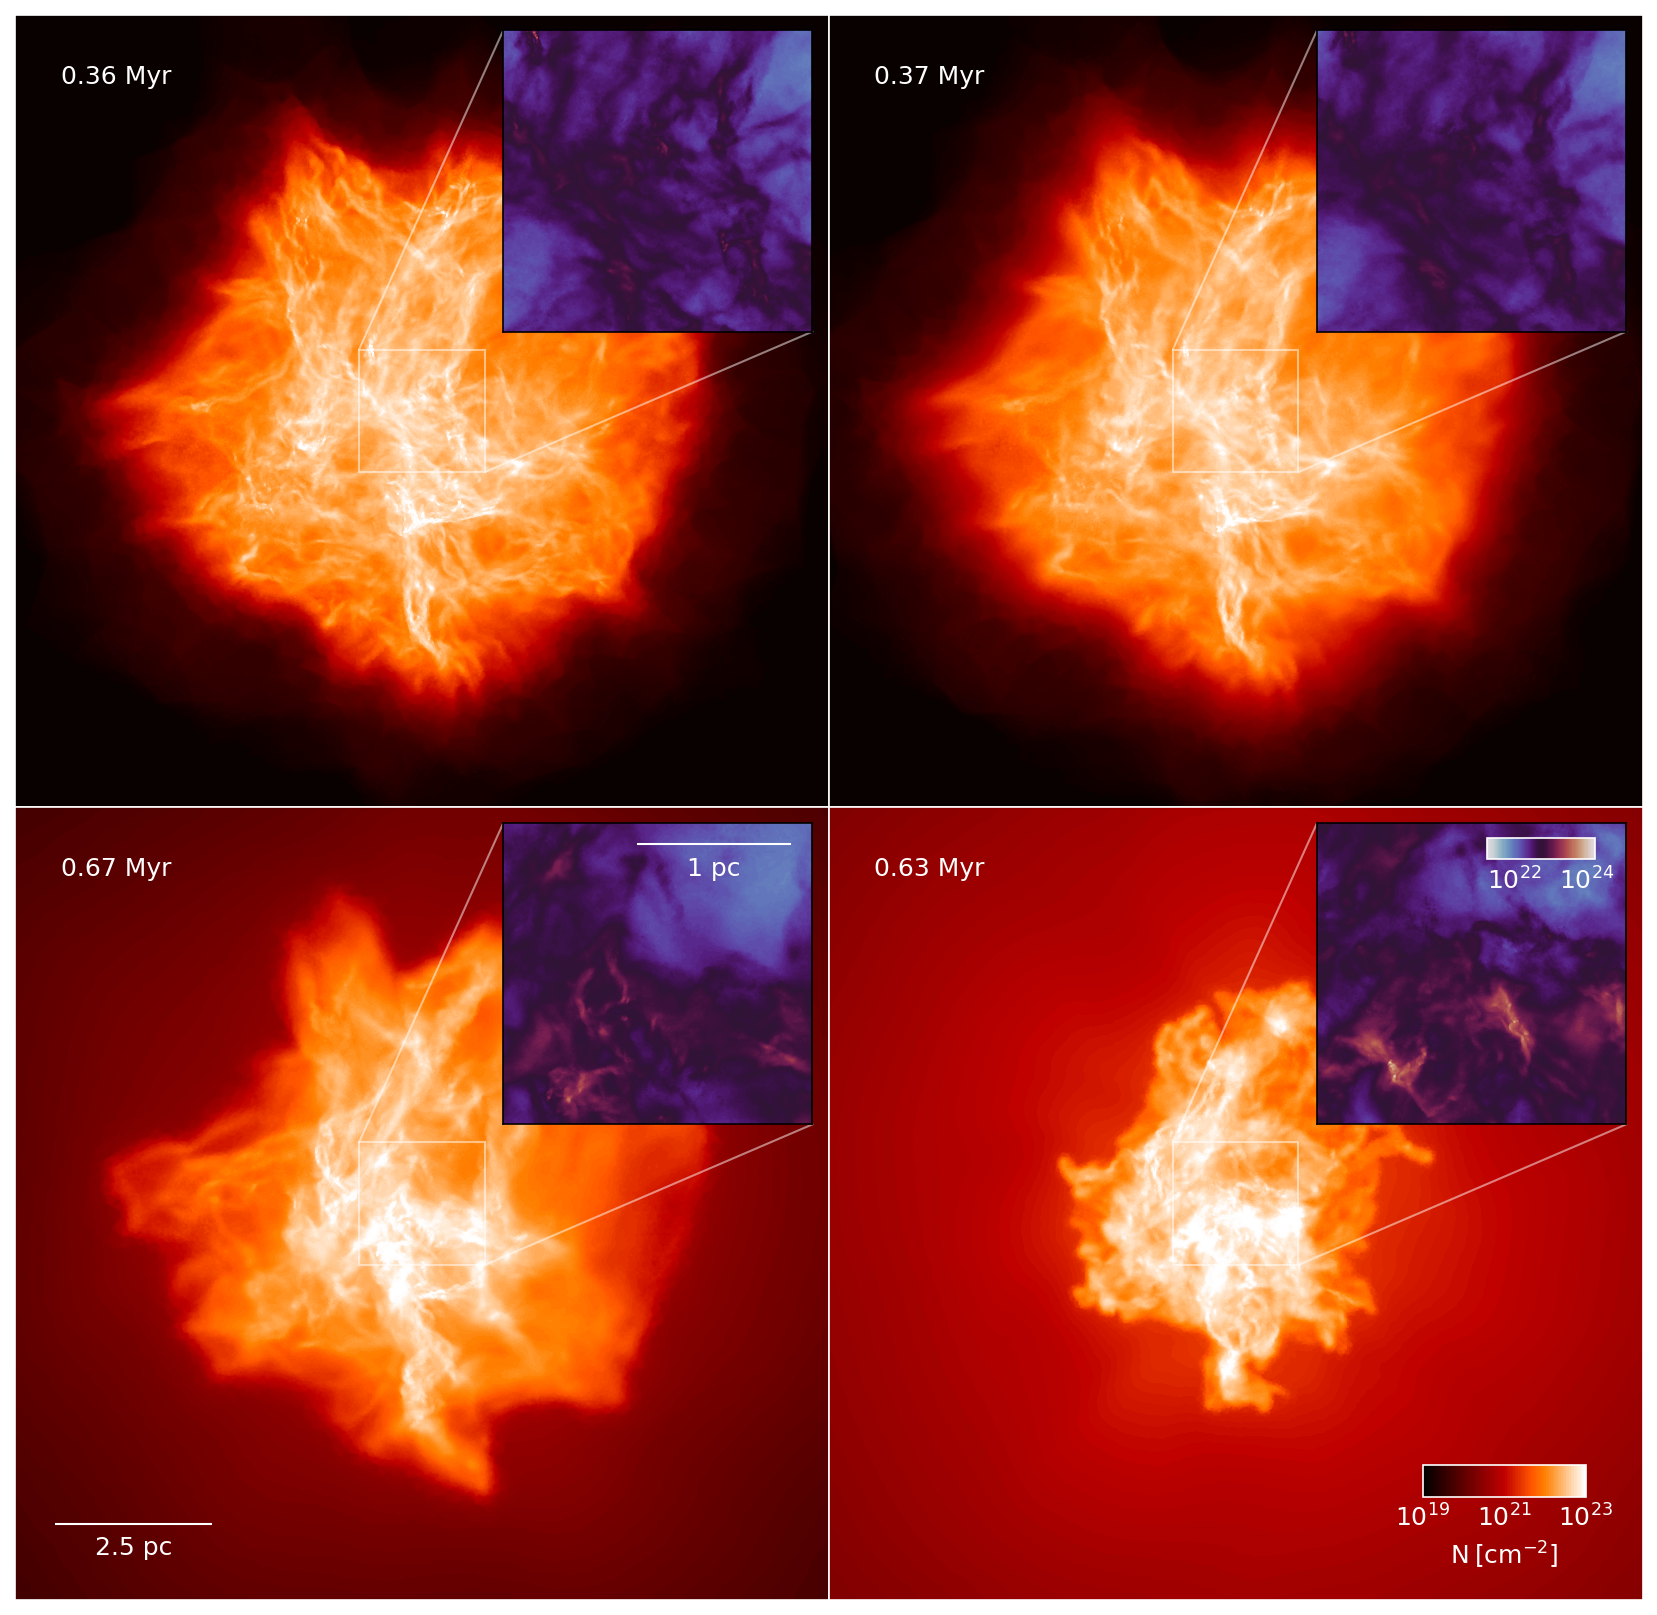

In [23]:
# Setup the figure
fig, axs = plt.subplots(2,2, figsize=(14,14))
fig.subplots_adjust(hspace=0, wspace=0)
matplotlib.rcParams['font.size'] = 12.
matplotlib.rcParams['axes.labelcolor'] = "white"
matplotlib.rcParams['xtick.labelcolor'] = "white"
matplotlib.rcParams['figure.dpi'] = 150

# Loop through each image and plot
ys = [0, 1, 0, 1]
xs = [0, 0, 1, 1]
images = [image1, image10, image100, image1000]
zooms = [zoom1, zoom10, zoom100, zoom1000]
data = [uv1, uv10, uv100, uv1000]

for i in range(4):
    image = images[i]
    zoom = zooms[i]
    ax = axs[xs[i], ys[i]]

    # Set scale for the main image
x

    # Get limits and max min values
    limits = [image.y0,image.y1,image.x0,image.x1]
    max_image = np.max(image.image)
    min_image = np.min(image.image)

    # Create plotting grid
    xgrid = np.linspace(image.x0,image.x1,image.nx)*image.ulength_cm/c.pc()
    ygrid = np.linspace(image.y0,image.y1,image.ny)*image.ulength_cm/c.pc()
    colgrid = image.image*image.umass_g/(1.4*c.mProt()*image.ulength_cm**2)

    # Do the plotting
    ax.set_xticks([])
    ax.set_yticks([])
    cs = ax.contourf(xgrid,ygrid,np.log10(colgrid+10**mincol),cmap='gist_heat',levels=lvls)

    # Serup the inset zoom
    x1, x2, y1, y2 = np.median(xgrid) - 1, np.median(xgrid) + 1, np.median(xgrid) - 1, np.median(xgrid) + 1
    axins = ax.inset_axes([0.6, 0.6, 0.38, 0.38], xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])
    axins.set_xticks([])
    axins.set_yticks([])

    # Create the zoom figure
    limits = [zoom.y0,zoom.y1,zoom.x0, zoom.x1]
    xgrid = np.linspace(zoom.x0,zoom.x1,zoom.nx)*image.ulength_cm/c.pc()
    ygrid = np.linspace(zoom.y0,zoom.y1,zoom.ny)*image.ulength_cm/c.pc()
    colgrid = zoom.image*image.umass_g/(1.4*c.mProt()*image.ulength_cm**2)

    # Set scale for the zoom 
    mincol = 19
    lvls = list(np.linspace(mincol+2.25, mincol+5.25, 100))

    ac = axins.contourf(xgrid, ygrid, np.log10(colgrid+10**mincol), cmap="twilight", levels=lvls)
    ax.indicate_inset_zoom(axins, edgecolor="white")

    plt.setp(ax.spines.values(), color="white")

    # Plot the time of the simulation
    time = data[i].time / c.uTime() / (1e6 * c.year())
    ax.text(24.5,35.6,"{:.2f} Myr".format(time), color="white")

    # Add the colourbar for main image
    if i == 3:
        # Colourbar for the big cloud
        cax = ax.inset_axes([0.73, 0.13, 0.2, 0.04])
        cbar = fig.colorbar(cs, cax=cax, orientation="horizontal")
        tks = np.linspace(lvls[0],lvls[-1],4)
        cbar.set_ticks([19, 21, 23])
        cbar.set_ticklabels(["$10^{19}$", "$10^{21}$", "$10^{23}$"])
        cbar.set_label("$\\rm N \: [cm^{-2}]$")
        cbar.ax.tick_params(size=0)
        cbar.outline.set_edgecolor("white")

        # Colourbar for the zoom in
        cax = axins.inset_axes([0.55, 0.88, 0.35, 0.07])
        cbar = fig.colorbar(ac, cax=cax, orientation="horizontal")
        cbar.set_ticks([22, 24])
        cbar.set_ticklabels(["$10^{22}$", "$10^{24}$"])
        cbar.ax.tick_params(size=0)
        cbar.outline.set_edgecolor("white")

    # Add the scale 
    if i == 2:
        # Scale for the big cloud
        asb = AnchoredSizeBar(ax.transData, 2.5, "2.5 pc", loc="lower left", frameon=False, borderpad=1.5, color="white", sep=6)
        ax.add_artist(asb)

        # Scale for the zoom ins
        asb2 = AnchoredSizeBar(axins.transData, 1, "1 pc", loc="upper right", frameon=False, borderpad=0.75, color="white", sep=6)
        axins.add_artist(asb2)

#### Dendogram Images

In [47]:
# Load in the image files and snapshots
image1 = readImage("/home/c.c1922522/apricot/column_cloudUV1_041.dat")
image10 = readImage("/home/c.c1922522/apricot/column_cloudUV10_042.dat")
image100 = readImage("/home/c.c1922522/apricot/column_cloudUV100_077.dat")
image1000 = readImage("/home/c.c1922522/apricot/column_cloudUV1000_072.dat")

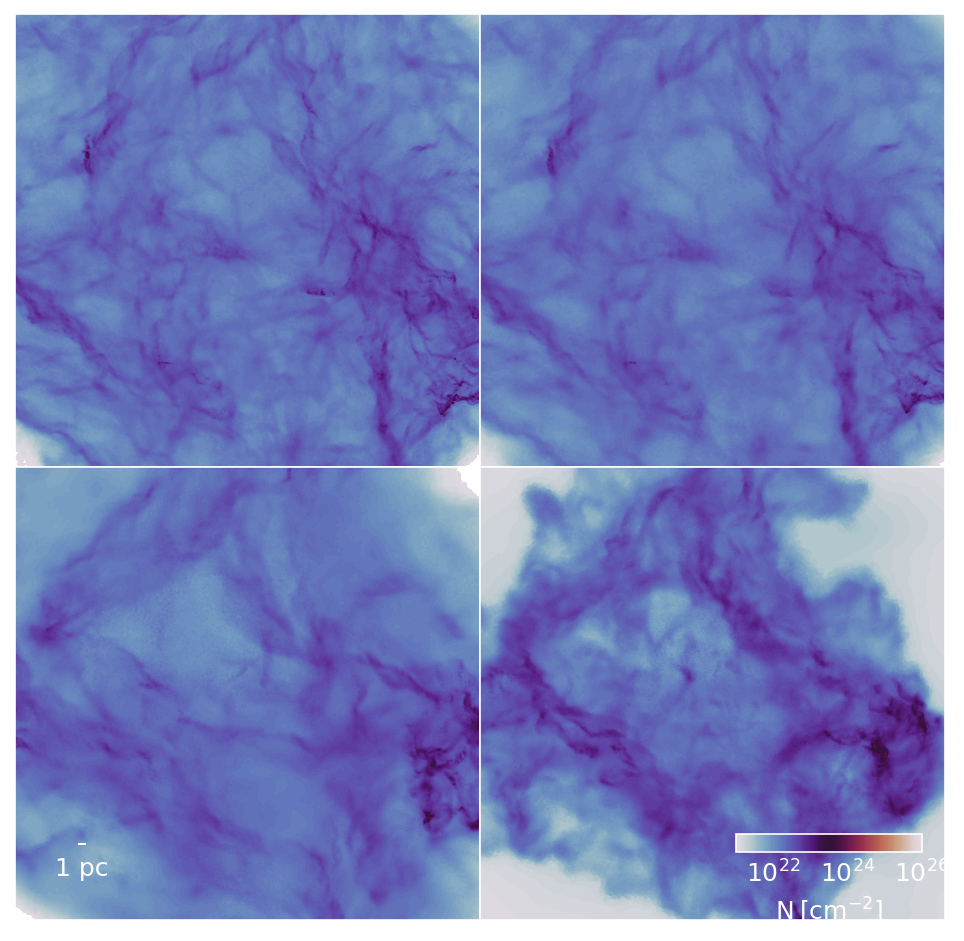

In [49]:
# Create the figure 
fig, axs = plt.subplots(2,2, figsize=(8,8))
fig.subplots_adjust(hspace=0, wspace=0)
matplotlib.rcParams['font.size'] = 12.
matplotlib.rcParams['axes.labelcolor'] = "white"
matplotlib.rcParams['xtick.labelcolor'] = "white"

# Loop through each image and plot
ys = [0, 1, 0, 1]
xs = [0, 0, 1, 1]
images = [image1, image10, image100, image1000]

mincol = 19
lvls = list(np.linspace(mincol+2, mincol+7, 100))

for i in range(4):
    image = images[i]

    # Get limits and max min values
    limits = [image.y0,image.y1,image.x0,image.x1]
    max_image = np.max(image.image)
    min_image = np.min(image.image)

    # Create plotting grid
    xgrid = np.linspace(image.x0,image.x1,image.nx)*image.ulength_cm/c.pc()
    ygrid = np.linspace(image.y0,image.y1,image.ny)*image.ulength_cm/c.pc()
    colgrid = image.image*image.umass_g/(1.4*c.mProt()*image.ulength_cm**2)

    # Do the plotting
    axs[xs[i], ys[i]].set_xticks([])
    axs[xs[i], ys[i]].set_yticks([])
    cs = axs[xs[i], ys[i]].contourf(xgrid,ygrid,np.log10(colgrid+10**mincol),cmap='twilight',levels=lvls)

    plt.setp(axs[xs[i], ys[i]].spines.values(), color="white")

    # Add the colourbar
    if i == 3:
        cax = axs[xs[i], ys[i]].inset_axes([0.55, 0.15, 0.4, 0.04])
        cbar = fig.colorbar(cs, cax=cax, orientation="horizontal")
        tks = np.linspace(lvls[0],lvls[-1],4)
        cbar.set_ticks([22, 24, 26])
        cbar.set_ticklabels(["$10^{22}$", "$10^{24}$", "$10^{26}$"])
        cbar.set_label("$\\rm N \: [cm^{-2}]$")
        cbar.ax.tick_params(size=0)
        cbar.outline.set_edgecolor("white")

    # Add the scale
    if i == 2:
        asb = AnchoredSizeBar(axs[xs[i], ys[i]].transData, 1, "1 pc", loc="lower left", frameon=False, borderpad=1.5, color="white", sep=6)
        axs[xs[i], ys[i]].add_artist(asb)

## Temperature-Density Diagrams

In [2]:
# Load in the snapshot data
uv1 = readAREPO("/scratch/c.c1922522/bigClouds/UV1/cloudUV1_160.hdf5", 1)
uv10 = readAREPO("/scratch/c.c1922522/bigClouds/UV10/cloudUV10_160.hdf5", 1)
uv100 = readAREPO("/scratch/c.c1922522/bigClouds/UV100/cloudUV100_160.hdf5", 1)
uv1000 = readAREPO("/scratch/c.c1922522/bigClouds/UV1000/cloudUV1000_160.hdf5", 1)

In [4]:
# Function to bin and average the temperatures
def binTemperatureDensity(temperature, density, mass, binNum=20):
    # Log density and work out bins
    numDense = np.log10(density)
    densityBins = np.linspace(np.min(numDense), np.max(numDense), binNum)

    # Arrays to store values
    gasTemp = np.zeros(binNum-1)
    densityMid = np.zeros(binNum-1)

    # Loop through bins and average
    for i in range(binNum-1):
        # Getting our bin ranges
        binMin = densityBins[i]
        binMax = densityBins[i+1]

        # Finding gas and temperture particles in this bin
        ind = np.where((numDense <= binMax) & (numDense >= binMin))    

        # Assigning avearage gas temperature and density
        gasTemp[i] = np.average(np.log10(temperature[ind]), weights=mass[ind])
        densityMid[i] = (binMax + binMin) / 2

    return densityMid, gasTemp

In [6]:
# Function to get number density from Jeans Mass
def nFromMass(T, Mj, mu=2.4):
    return ((375 * c.kB()**3) / (4 * np.pi * c.G()**3 * (mu * c.mProt())**4)) * T**3 / (Mj**2)

#def tFromMass(n, Mj, mu=2.4):
#    return ((Mj**2) * n / ((375 * c.kB()**3) / (4 * np.pi * c.G()**3 * (mu * c.mProt())**4)))**(1/3)

def tFromMass(n, Mj, mu=2.4):
    return ((Mj**(2/3) * c.G()) / (np.pi * c.kB())) * (mu * c.mProt())**(4/3) * n**(1/3)

Text(0.5, 0.09, 'Number Density [$\\rm {cm^{-3}}$]')

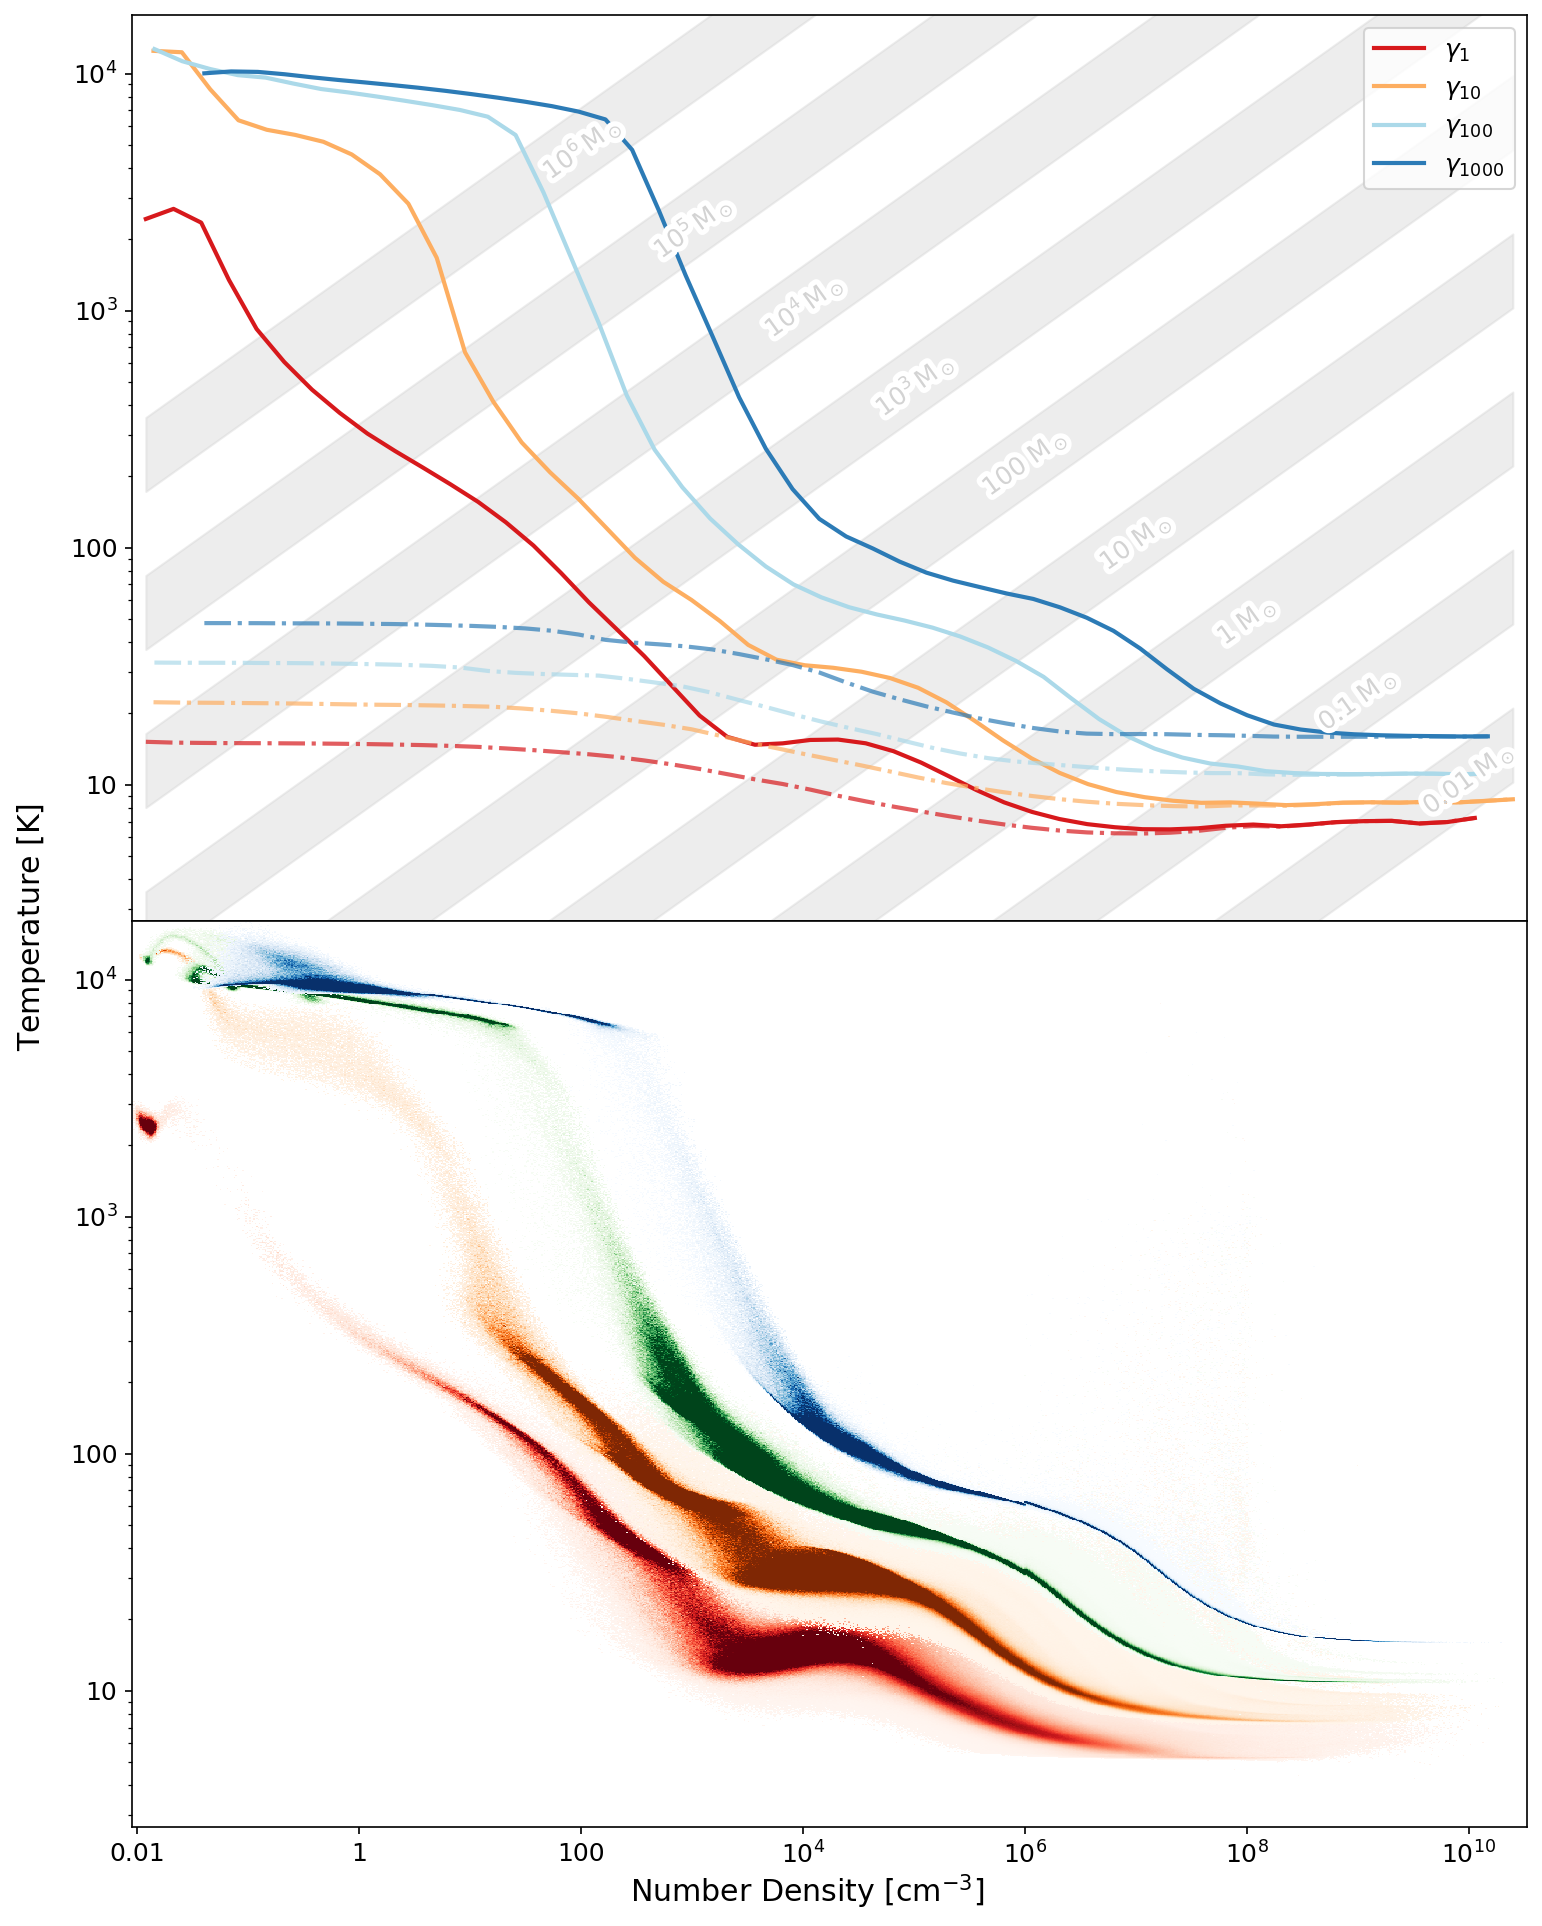

In [7]:
# Create the figure
fig, ax = plt.subplots(2,1, sharex=True, sharey=True, figsize=(12,16))
fig.subplots_adjust(hspace=0, wspace=0)
matplotlib.rcParams['font.size'] = 12.
matplotlib.rcParams['figure.dpi'] = 150

# Bin the gas and dust temperatures
bins=50

n1, t1 = binTemperatureDensity(uv1.gasTemp, uv1.numberDensity, uv1.mass, bins)
n10, t10 = binTemperatureDensity(uv10.gasTemp, uv10.numberDensity, uv10.mass, bins)
n100, t100 = binTemperatureDensity(uv100.gasTemp, uv100.numberDensity, uv100.mass, bins)
n1000, t1000 = binTemperatureDensity(uv1000.gasTemp, uv1000.numberDensity, uv1000.mass, bins)

n1, d1 = binTemperatureDensity(uv1.dustTemp, uv1.numberDensity, uv1.mass, bins)
n10, d10 = binTemperatureDensity(uv10.dustTemp, uv10.numberDensity, uv10.mass, bins)
n100, d100 = binTemperatureDensity(uv100.dustTemp, uv100.numberDensity, uv100.mass, bins)
n1000, d1000 = binTemperatureDensity(uv1000.dustTemp, uv1000.numberDensity, uv1000.mass, bins)

# Plot lines of constant Jeans Mass
n = 10**np.linspace(np.min(n1), np.max(n10), 100)
M = np.array([0.01, 0.1, 1, 10, 100, 1000, 10000, 1e5, 1e6])
labels = ["0.01 $\\rm M_\\odot$","0.1 $\\rm M_\\odot$", "1 $\\rm M_\\odot$", "10 $\\rm M_\\odot$", "100 $\\rm M_\\odot$", "$10^3 \\, \\rm M_\\odot$", "$10^4 \\, \\rm M_\\odot$", "$10^5 \\, \\rm M_\\odot$", "$10^6 \\, \\rm M_\\odot$"]
for i in range(len(M)):
    #ax[0].plot(nFromMass(T, M[i]*1.991e33), T, label=labels[i], color="lightgray", alpha=0.5, linestyle="--")
    #ax[0].plot(nFromMass(T, M[i]*1.991e33, 1.4), T, label=labels[i], color="lightgray", alpha=0.5, linestyle="--")
    ax[0].fill_between(n, tFromMass(n, M[i]*1.991e33), tFromMass(n, M[i]*1.991e33, 1.4), color="lightgray", alpha=0.4)
    ax[0].plot(n, tFromMass(n, M[i]*1.991e33, 1.8), label=labels[i], color="lightgray", alpha=0.0, linestyle="--")

labelLines(ax[0].get_lines(), zorder=2.5, xvals=[1e10, 1e9, 1e8, 1e7, 1e6, 1e5, 1e4, 1e3, 1e2])

# Plot the top panel
ax[0].plot(10**n1, 10**d1, c.colours()[0], linewidth=2, linestyle="-.", alpha=0.7)
l1, = ax[0].plot(10**n1, 10**t1, c.colours()[0], label="$\\gamma_1$", linewidth=2)
ax[0].plot(10**n10, 10**d10, c.colours()[1], linewidth=2, linestyle="-.", alpha=0.7)
l2, = ax[0].plot(10**n10, 10**t10, c.colours()[1], label="$\\gamma_{10}$", linewidth=2)
ax[0].plot(10**n100, 10**d100, c.colours()[3], linewidth=2, linestyle="-.", alpha=0.7)
l3, = ax[0].plot(10**n100, 10**t100,  c.colours()[3], label="$\\gamma_{100}$", linewidth=2)
ax[0].plot(10**n1000, 10**d1000, c.colours()[4], linewidth=2, linestyle="-.", alpha=0.7)
l4, = ax[0].plot(10**n1000, 10**t1000, c.colours()[4], label="$\\gamma_{1000}$", linewidth=2)

ax[0].legend(loc="upper right", handles=[l1,l2,l3,l4])
ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].set_yticks([10, 100, 1000, 1e4], ["10", "100", "$10^3$", "$10^4$"])

# Create a common normalisation between the simulations
maxMasses = np.array([np.max(uv1.mass), np.max(uv10.mass), np.max(uv100.mass), np.max(uv1000.mass)])
minMasses = np.array([np.min(uv1.mass), np.min(uv10.mass), np.min(uv100.mass), np.min(uv1000.mass)])
totalNorm = matplotlib.colors.Normalize(vmin=np.min(minMasses)/1.991e33, vmax=10*np.max(maxMasses)/1.991e33, clip=False)

# Create log spaced bins for the histograms
xBins = np.linspace(np.log10(np.min(uv1.numberDensity)), np.log10(np.max(uv10.numberDensity)), 1000)
yBins = np.linspace(np.log10(np.min(uv1.gasTemp)), np.log10(np.max(uv1000.gasTemp)), 1000)
bins = (10**xBins, 10**yBins)

# Plot the histograms
h = ax[1].hist2d(uv1.numberDensity, uv1.gasTemp, weights=uv1.mass/c.uMass(), cmap="Reds", norm=totalNorm, cmin=0.0001, bins=bins)
h = ax[1].hist2d(uv10.numberDensity, uv10.gasTemp, weights=uv10.mass/c.uMass(), cmap="Oranges", norm=totalNorm, cmin=0.0001, bins=bins)
h = ax[1].hist2d(uv100.numberDensity, uv100.gasTemp, weights=uv100.mass/c.uMass(), cmap="Greens", norm=totalNorm, cmin=0.0001, bins=bins)
h = ax[1].hist2d(uv1000.numberDensity, uv1000.gasTemp, weights=uv1000.mass/c.uMass(), cmap="Blues", norm=totalNorm, cmin=0.0001, bins=bins)

# Add ticks and labels
ax[1].set_xticks([0.01, 1, 100, 1e4, 1e6, 1e8, 1e10], ["0.01", "1", "100", "$10^4$", "$10^6$", "$10^8$", "$10^{10}$"])

fig.supylabel("Temperature [$\\rm K$]", x=0.06)
fig.supxlabel("Number Density [$\\rm {cm^{-3}}$]", y=0.09)

## Chemistry Plots

In [4]:
# Extract chemistry variables
uv1.extractChemistry()
uv10.extractChemistry()
uv100.extractChemistry()
uv1000.extractChemistry()

In [6]:
def binAbundances(data, nBins=50):
    # Log density and work out bins
    numDense = np.log10(data.numberDensity)
    densityBins = np.linspace(np.min(numDense), np.max(numDense), nBins)

    # Arrays to store values
    hAbund = np.zeros((nBins-1,3))
    densityMid = np.zeros(nBins-1)

    # Loop through bins and average
    for i in range(nBins-1):
        # Getting our bin ranges
        binMin = densityBins[i]
        binMax = densityBins[i+1]

        # Finding gas and temperture particles in this bin
        ind = np.where((numDense <= binMax) & (numDense >= binMin))    

        # Assigning avearage gas temperature and density
        hAbund[i,0] = np.average(data.H2[ind] * 2)
        hAbund[i,1] = np.average(data.HI[ind])
        hAbund[i,2] = np.average(data.H[ind])

        densityMid[i] = (binMax + binMin) / 2

    return densityMid, hAbund

In [7]:
# Bin stuff
n1, t1 = binTemperatureDensity(uv1.gasTemp, uv1.numberDensity, uv1.mass, 50)
n, hAbund1 = binAbundances(uv1, 50)
n10, t10 = binTemperatureDensity(uv10.gasTemp, uv10.numberDensity, uv10.mass, 50)
n, hAbund10 = binAbundances(uv10, 50)
n100, t100 = binTemperatureDensity(uv100.gasTemp, uv100.numberDensity, uv100.mass, 50)
n, hAbund100 = binAbundances(uv100, 50)
n1000, t1000 = binTemperatureDensity(uv1000.gasTemp, uv1000.numberDensity, uv1000.mass, 50)
n, hAbund1000 = binAbundances(uv1000, 50)

Text(0.5, 0.06, 'Number Density [$\\rm cm^{-3}$]')

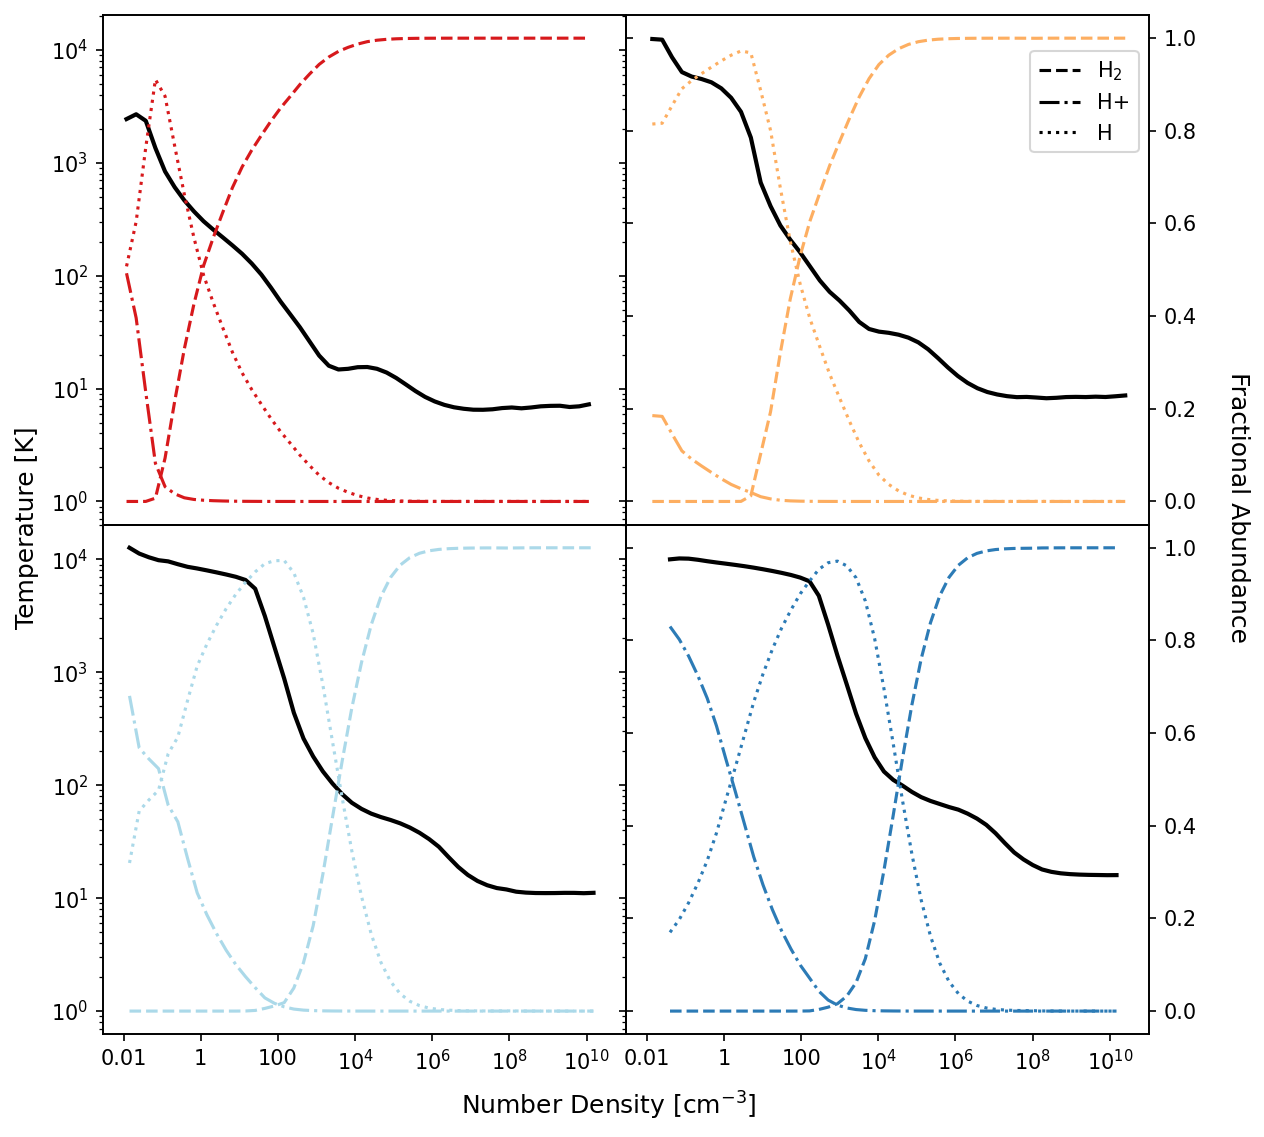

In [36]:
fig, axs = plt.subplots(2,2, figsize=(9,9), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0, wspace=0)

densities = np.array([[n1, n10], [n100, n1000]], dtype=object)
temps = np.array([[t1, t10], [t100, t1000]], dtype=object)
abunds = np.array([[hAbund1, hAbund10], [hAbund100, hAbund1000]], dtype=object)
colours = np.array([[c.colours()[0], c.colours()[1]], [c.colours()[3], c.colours()[4]]])

for i in range(2):
    for j in range(2):
        ax = axs[i,j]
        ax.plot(10**densities[i,j], 10**temps[i,j], color="k", linewidth=2)

        ax2 = ax.twinx()
        ax2.plot(10**densities[i,j], abunds[i,j][:,0], color=colours[i,j], linestyle="--")
        ax2.plot(10**densities[i,j], abunds[i,j][:,1], color=colours[i,j], linestyle="-.")
        ax2.plot(10**densities[i,j], abunds[i,j][:,2], color=colours[i,j], linestyle=":")

        if j == 1:
            pass
        else:
            ax2.set_yticklabels([])

# Dummy lines for neutral legend
axs[0,1].plot(0, 1, "k--", alpha=1, label="$\\rm H_2$")
axs[0,1].plot(0, 1, "k-.", alpha=1, label="H+")
axs[0,1].plot(0, 1, "k:", alpha=1, label="H")
axs[0,1].legend(loc="upper right", bbox_to_anchor=(0.9, 0.85, 0.1, 0.1))

axs[0,0].set_xscale("log")
axs[0,0].set_yscale("log")

axs[0,0].set_xticks([0.01, 1, 100, 1e4, 1e6, 1e8, 1e10], ["0.01", "1", "100", "$10^4$", "$10^6$", "$10^8$", "$10^{10}$"])
axs[1,1].text(1e13, 2e3, "Fractional Abundance", rotation=270, fontsize=12)

fig.supylabel("Temperature [K]", x=0.06)
fig.supxlabel("Number Density [$\\rm cm^{-3}$]", y=0.06)


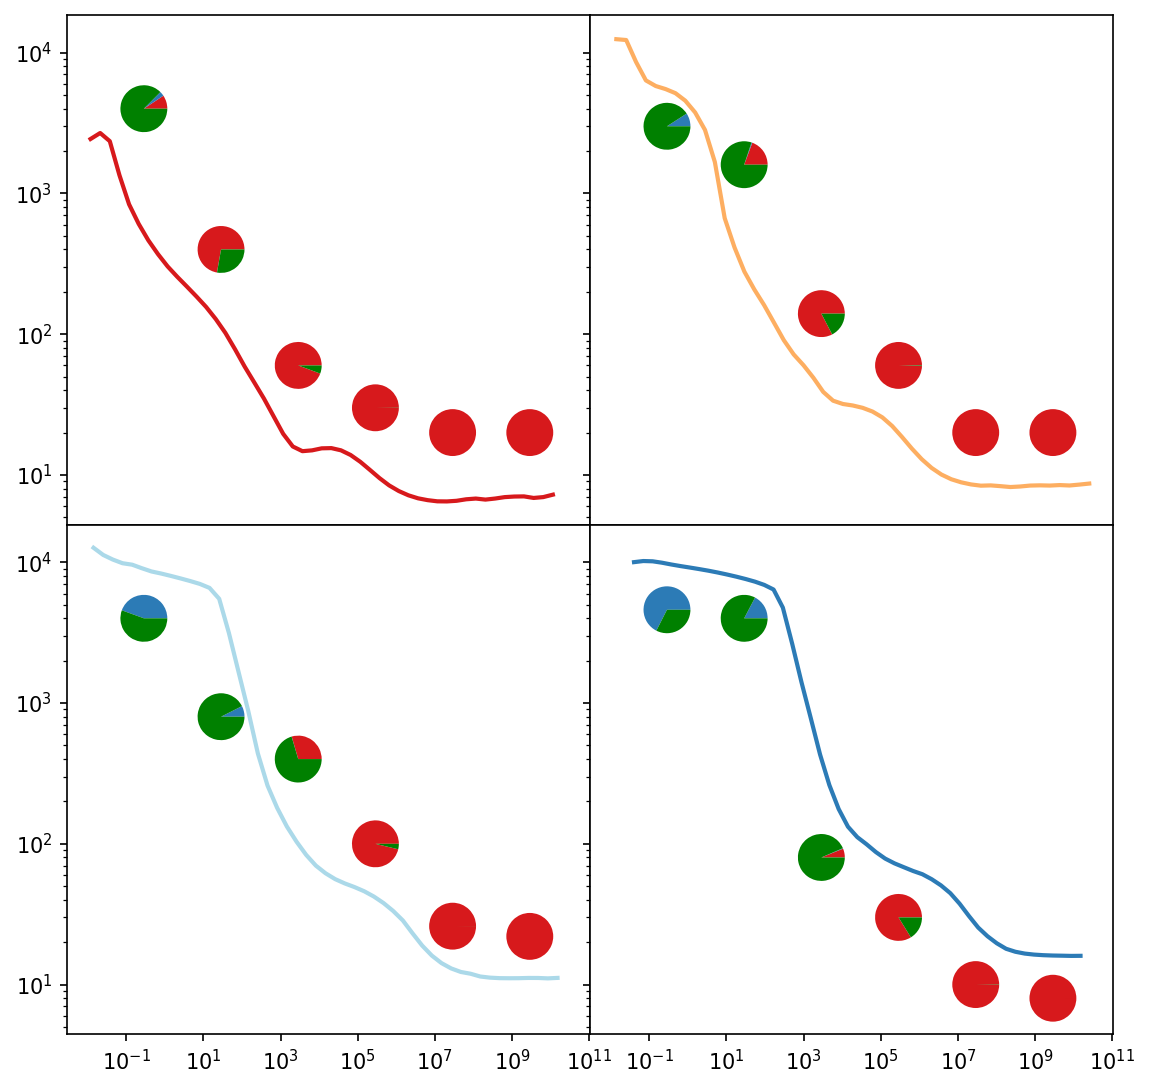

In [108]:
fig, axs = plt.subplots(2,2, figsize=(9,9), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0, wspace=0)

densities = np.array([[n1, n10], [n100, n1000]], dtype=object)
temps = np.array([[t1, t10], [t100, t1000]], dtype=object)
abunds = np.array([[hAbund1, hAbund10], [hAbund100, hAbund1000]], dtype=object)
colours = np.array([[c.colours()[0], c.colours()[1]], [c.colours()[3], c.colours()[4]]])

pieDensities = np.array([1e-1, 1e1, 1e3, 1e5, 1e7, 1e9])
pieX = pieDensities * 16

pieTemps1 = np.array([2e3, 200, 30, 15, 10, 10])
pieTemps2 = np.array([1.5e3, 800, 70, 30, 10, 10])
pieTemps3 = np.array([2e3, 400, 200, 50, 13, 11])
pieTemps4 = np.array([2.3e3, 2e3, 40, 15, 5, 4])

pieTemps = np.array([[pieTemps1, pieTemps2], [pieTemps3, pieTemps4]], dtype=object)

for i in range(2):
    for j in range(2):
        ax = axs[i,j]
        ax.plot(10**densities[i,j], 10**temps[i,j], color=colours[i,j], linewidth=2)

        for k in range(len(pieDensities)):
            axins = ax.inset_axes([pieDensities[k]-0.5*pieDensities[k], pieTemps[i,j][k], pieX[k], pieTemps[i,j][k]*3], transform=ax.transData)
            axins.set_xticks([])
            axins.set_yticks([]) 
            
            inThis = np.where(10**n1 > pieDensities[k])
            axins.pie(abunds[i,j][inThis[0][0]], colors=[c.colours()[0], c.colours()[4], "green"])

axs[0,0].set_xscale("log")
axs[0,0].set_yscale("log")

Text(0.5, 0.09, 'Number Density [$\\rm {cm^{-3}}$]')

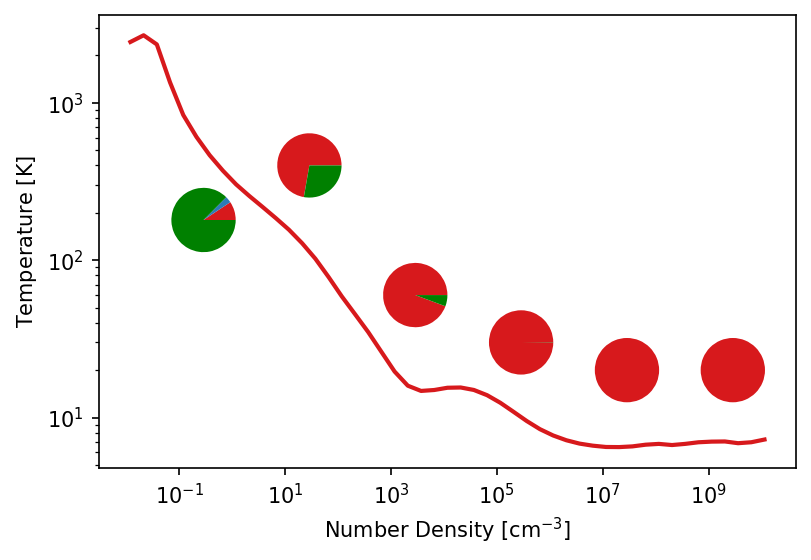

In [86]:
# Create the figure
fig = plt.figure(figsize=(6,4))
ax = plt.subplot(1,1,1)

ax.plot(10**n1, 10**t1, color=c.colours()[0], linewidth=2)

pieDensities = np.array([1e-1, 1e1, 1e3, 1e5, 1e7, 1e9])
pieX = pieDensities * 16

pieTemps = np.array([90, 200, 30, 15, 10, 10])
pieY = pieTemps * 3

for i in range(len(pieDensities)):
    axins = ax.inset_axes([pieDensities[i]-0.5*pieDensities[i], pieTemps[i], pieX[i], pieY[i]], transform=ax.transData)
    axins.set_xticks([])
    axins.set_yticks([]) 
    
    inThis = np.where(10**n1 > pieDensities[i])
    axins.pie(hAbund[inThis[0][0]], colors=[c.colours()[0], c.colours()[4], "green"])


ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel("Temperature [$\\rm K$]", x=0.06)
ax.set_xlabel("Number Density [$\\rm {cm^{-3}}$]", y=0.09)

## Heating and Cooling Rates

In [2]:
# Load snapshots containing the rates
uv1 = readAREPO("/scratch/c.c1922522/bigClouds/postProcessing/cloudUV1_042.hdf5", 1)
uv1.extractRates()
uv10 = readAREPO("/scratch/c.c1922522/bigClouds/postProcessing/cloudUV10_043.hdf5", 1)
uv10.extractRates()
uv100 = readAREPO("/scratch/c.c1922522/bigClouds/postProcessing/cloudUV100_078.hdf5", 1)
uv100.extractRates()
uv1000 = readAREPO("/scratch/c.c1922522/bigClouds/postProcessing/cloudUV1000_073.hdf5", 1)
uv1000.extractRates()

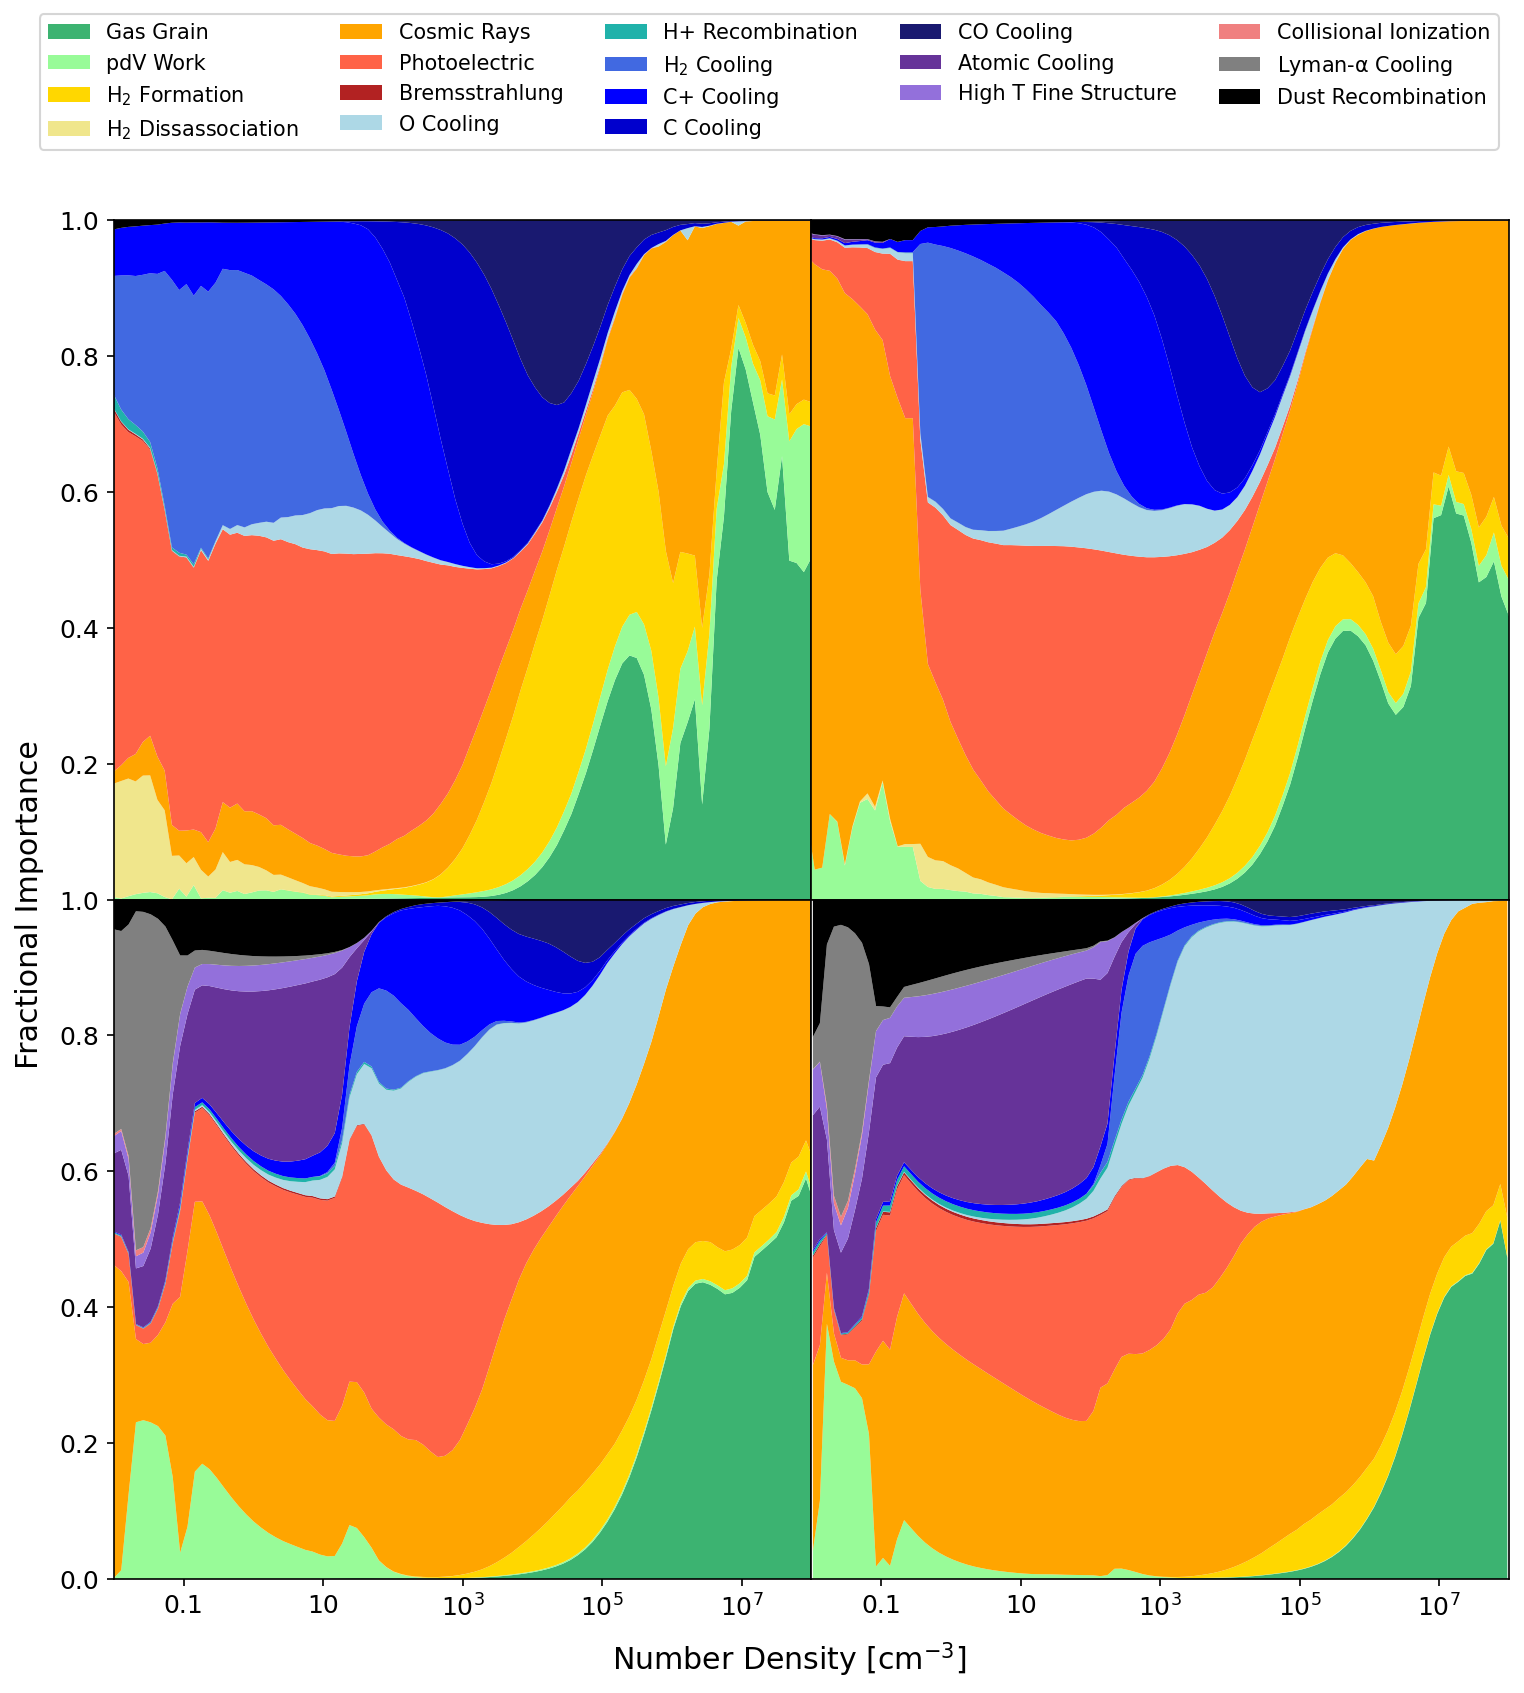

In [5]:
# Setup figure
matplotlib.rcParams['figure.dpi'] = 150
matplotlib.rcParams['font.size'] = 12.

fig, axs = plt.subplots(2,2, figsize=(12, 12), sharex=True)
fig.subplots_adjust(hspace=0, wspace=0)

data = [uv1, uv10, uv100, uv1000]
xs = [0,0,1,1]
ys = [0,1,0,1]

cols = ["mediumseagreen", "palegreen", "gold", "khaki", 
        "orange", "tomato", "firebrick", "lightblue", 
        "lightseagreen", "royalblue", "blue", "mediumblue",
        "midnightblue", "rebeccapurple", "mediumpurple", 
        "lightcoral", "grey", "black"]

for i in range(4):
   # b, r, l, _ = data[i].plotHealCoolRates(normalised=True)
    b, r, l, c = plotHealCoolRates(data[i], normalised=True)
    a = axs[xs[i], ys[i]].stackplot(b, r, labels=l, colors=cols)

    axs[xs[i], ys[i]].set_ylim(0,1)
    axs[xs[i], ys[i]].set_yticks([])

# Format the figure
axs[0,0].set_xscale("log")
axs[0,0].set_xlim(1e-2, 1e8)
axs[0,0].set_ylim(0, 1)
axs[0,0].set_xticks([1e-1, 10, 1e3, 1e5, 1e7], ["0.1", "10", "$10^3$", "$10^5$", "$10^7$"])

axs[0,0].set_yticks([0.2, 0.4, 0.6, 0.8, 1])
axs[1,0].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])

fig.supxlabel("Number Density [$\\rm cm^{-3}$]", y=0.07)
fig.supylabel("Fractional Importance", x=0.07)
fig.legend(handles=a, ncols=5, fontsize="small", bbox_to_anchor=(0.9,1))

In [3]:
# Plot the fractional heating and cooling rates
def plotHealCoolRates(data, nBins=100, normalised=False):
    # Create bins 
    rates = np.zeros((nBins, np.shape(data.rates)[1]+1))
    densityBins = 10**np.linspace(np.log10(np.min(data.numberDensity))+0.0001, np.log10(np.max(data.numberDensity))-0.0001, nBins+1)

    # Loop through each density bin
    for i in range(nBins):
        inBin = np.where((data.numberDensity > densityBins[i]) & (data.numberDensity <= densityBins[i+1]))

        # Pass if we've got an empty bin
        if len(inBin[0]) == 0:
            rates[i] = rates[i-1]
        else:
            # Extract each of the rates from the rates array
            for j in range(np.shape(data.rates)[1]):
                rates[i,j] = np.abs(np.average(data.rates[:,j][inBin], weights=data.mass[inBin]))
                #rates[i,j] = np.abs(np.sum(data.rates[:,j][inBin] * data.mass[inBin] / data.rho[inBin]))

            # Add in the pdV work term
            rates[i,np.shape(data.rates)[1]] = np.abs(np.average((5/3 - 1) * data.velocityDivergence[inBin] * (36447.2682 / 1e17) * data.rho[inBin] * data.u[inBin], weights=data.mass[inBin]))
            #rates[i,np.shape(data.rates)[1]] = np.sum(np.abs((5/3 - 1) * data.velocityDivergence[inBin] * (36447.2682 / 1e17) * data.mass[inBin] * data.u[inBin]))


        if normalised:
            rates[i] = rates[i] / np.sum(rates[i])    

    # Plot the data
    labels = ["Gas Grain", "pdV Work", "$\\rm H_2$ Formation", "$\\rm H_2$ Dissassociation", "Cosmic Rays", "Photoelectric","Bremsstrahlung", "O Cooling", "H+ Recombination", "$\\rm H_2$ Cooling", "C+ Cooling", "C Cooling", "CO Cooling", "Atomic Cooling", "High T Fine Structure", "Collisional Ionization", "Lyman-$\\rm \\alpha$ Cooling", "Dust Recombination"]
    colours = ["green", "lightgreen", "gold", "darkorange", "orange", "red", "darkred", "lightblue",  "cornflowerblue", "royalblue", "blue", "mediumblue", "darkblue", "slateblue", "mediumpurple", "purple", "gray", "black"]
    ratArr = [rates[:,0], rates[:,-1], rates[:,15], (rates[:,12]+rates[:,13]), rates[:,6], rates[:,7], rates[:,5], rates[:,8], rates[:,17], rates[:,1], rates[:,9], rates[:,-2], (rates[:,18]+rates[:,19]+rates[:,20]), rates[:,2],  rates[:,11], rates[:,16], rates[:,3], rates[:,10]]
        
    return (densityBins[1:]+densityBins[:-1])/2, ratArr, labels, colours

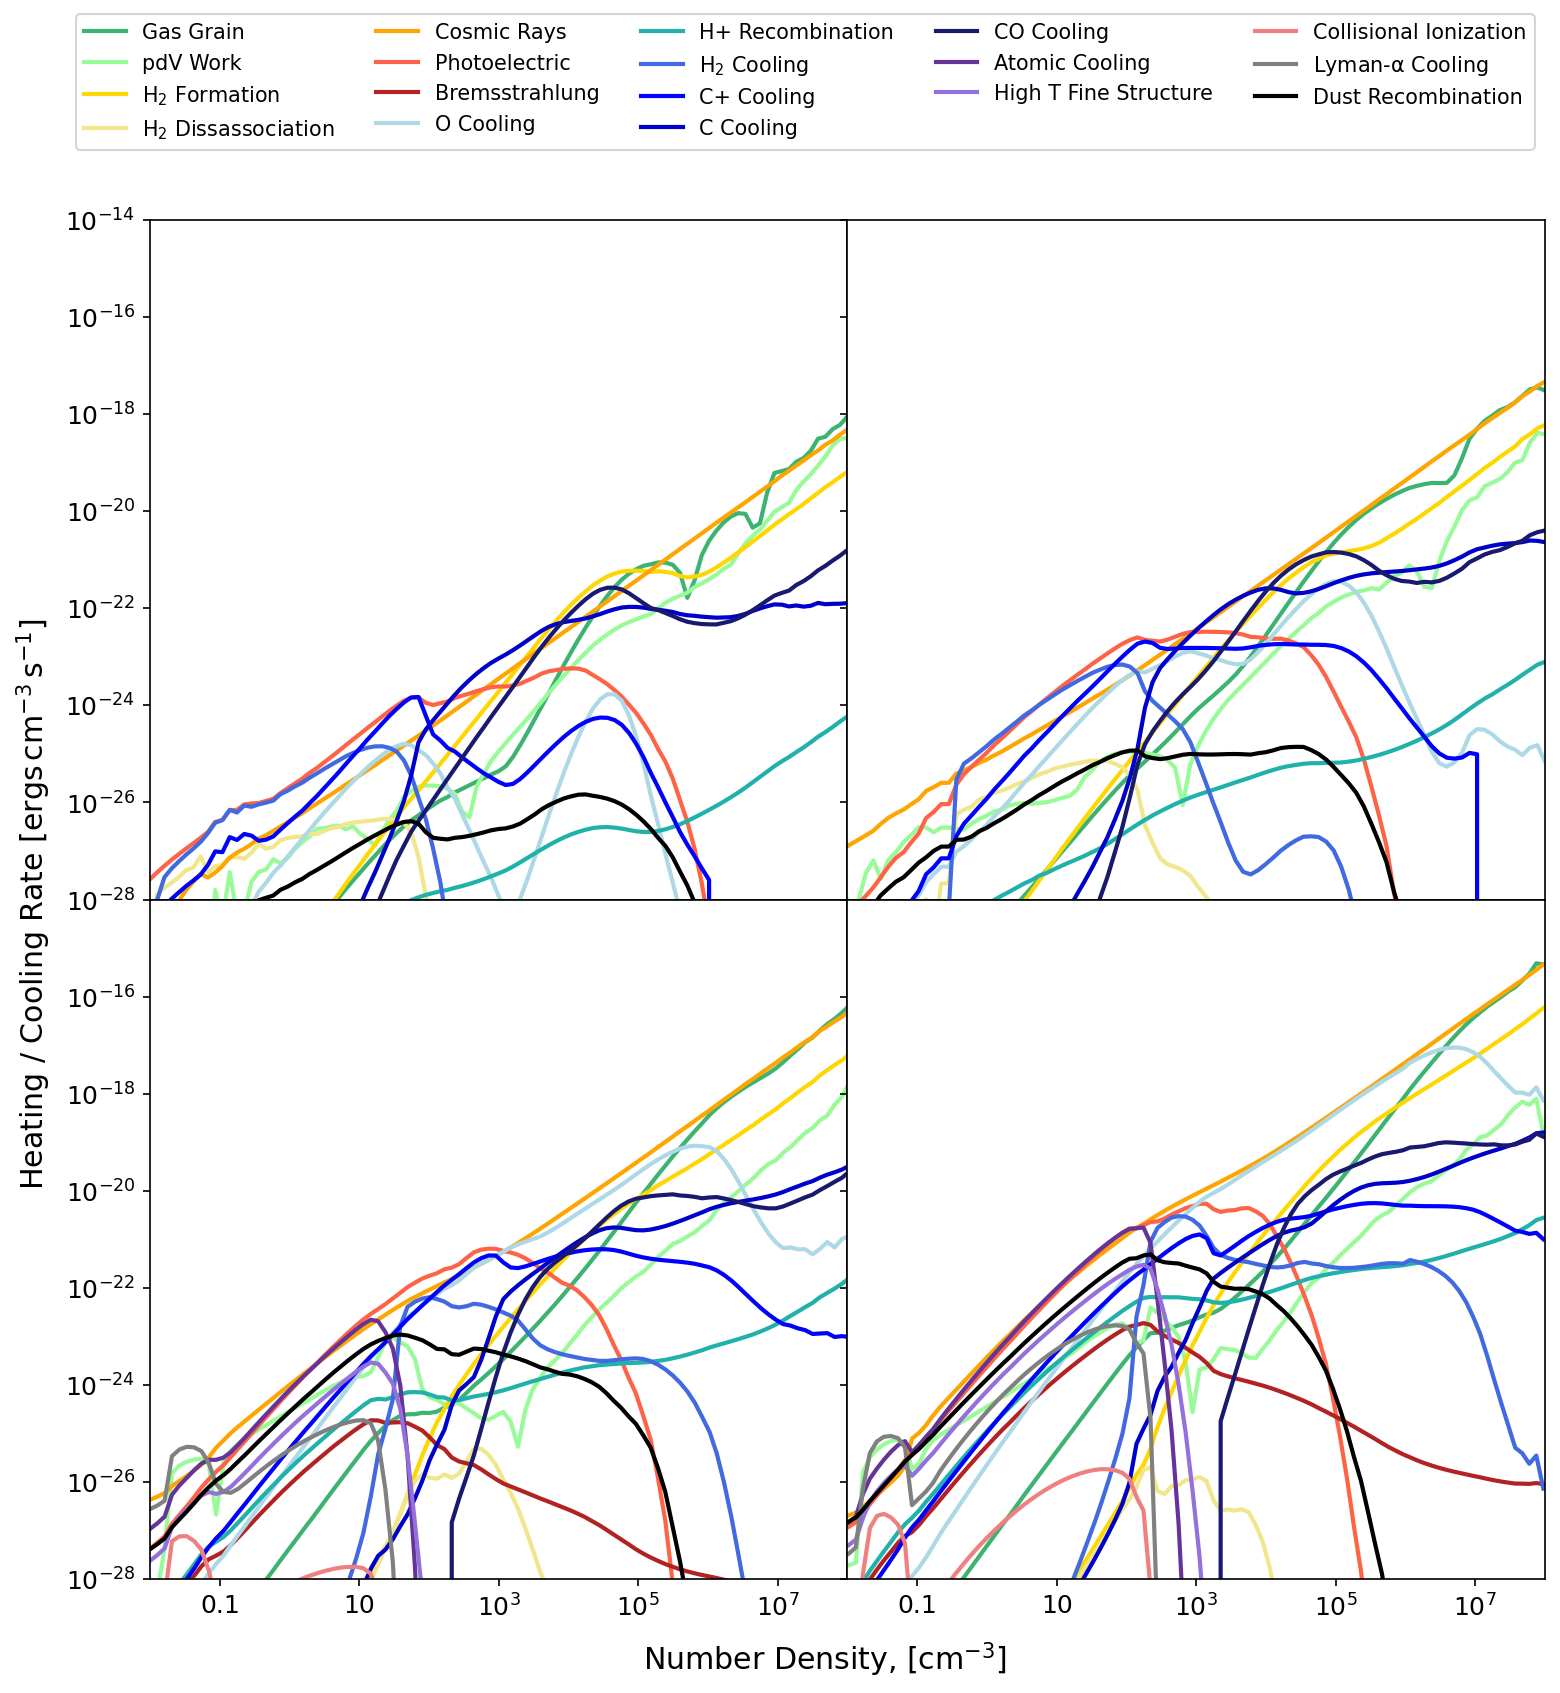

In [22]:
# Setup figure
matplotlib.rcParams['figure.dpi'] = 150
matplotlib.rcParams['font.size'] = 12.

fig, axs = plt.subplots(2,2, figsize=(12, 12), sharex=True)
fig.subplots_adjust(hspace=0, wspace=0)

data = [uv1, uv10, uv100, uv1000]
xs = [0,0,1,1]
ys = [0,1,0,1]

for i in range(4):
    b, r, l, c = data[i].plotHealCoolRates(normalised=False)

    lines = []

    for j in range(len(l)):
        line, = axs[xs[i], ys[i]].plot(b, r[j], label=l[j], color=cols[j], linewidth=2)

        lines.append(line)
    ax = axs[xs[i], ys[i]]

    ax.set_ylim(1e-28, 1e-14)
    ax.set_yscale("log")

    #ax.plot(b, r[0], c[0], l[0], linewidth=2)
    #ax.plot(b, r[1], c[1], l[1], linewidth=2)
    #labelLines(ax.get_lines())

axs[0,1].set_yticklabels([])
axs[1,1].set_yticklabels([])

# Format the figure
axs[0,0].set_xscale("log")
axs[0,0].set_xlim(1e-2, 1e8)
axs[0,0].set_xticks([1e-1, 10, 1e3, 1e5, 1e7], ["0.1", "10", "$10^3$", "$10^5$", "$10^7$"])

axs[0,0].set_yscale("log")
axs[0,0].set_ylim(1e-28, 1e-14)

axs[0,0].set_yticks([1e-28, 1e-26, 1e-24, 1e-22, 1e-20, 1e-18, 1e-16, 1e-14])
axs[1,0].set_yticks([1e-28, 1e-26, 1e-24, 1e-22, 1e-20, 1e-18, 1e-16])

fig.supxlabel("Number Density, [$\\rm cm^{-3}$]", y=0.07)
fig.supylabel("Heating / Cooling Rate $\\rm [ergs \\, cm^{-3} \\, s^{-1}]$", x=0.05)
fig.legend(handles=lines, ncols=5, fontsize="small", bbox_to_anchor=(0.9,1))

/home/c.c1922522/.local/lib/python3.9/site-packages/labellines/core.py:216: UserWarning: The value at position 6 in `xvals` is outside the range of its associated line (xmin=0.004841497786329283, xmax=98680945.83798076, xval=0). Clipping it into the allowed range.
  warnings.warn(


Text(0.05, 0.5, 'Heating / Cooling Rate [$\\rm ergs \\, cm^{-3} \\, s^{-1}$]')

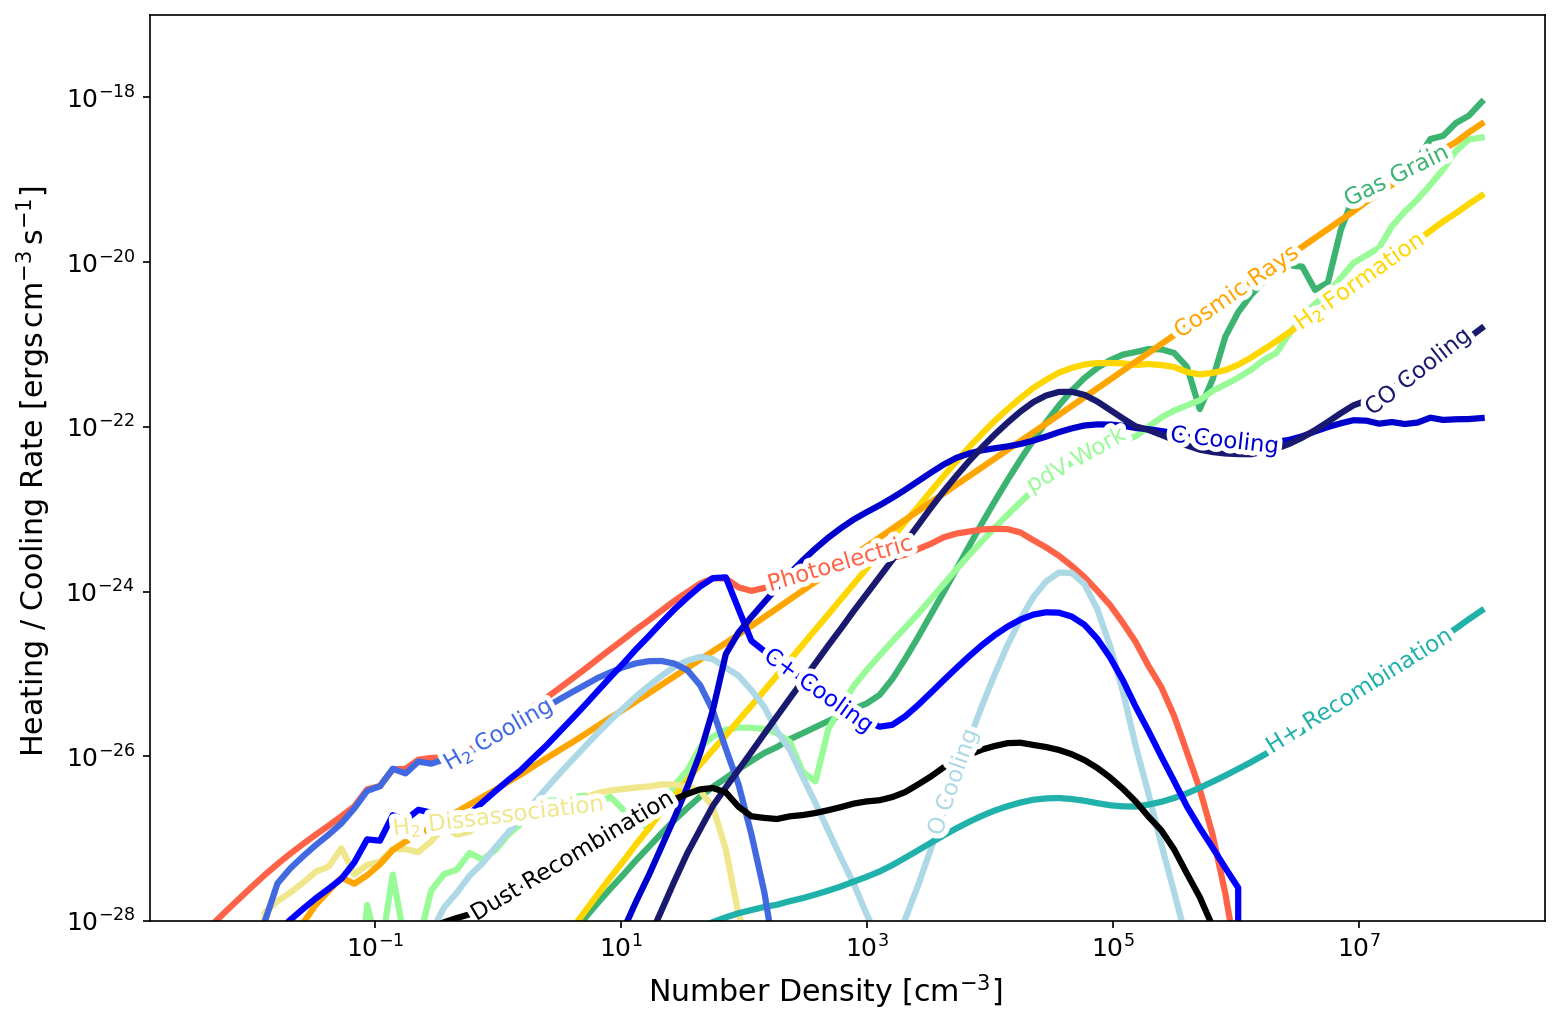

In [23]:
# Setup figure
matplotlib.rcParams['figure.dpi'] = 150
matplotlib.rcParams['font.size'] = 12.
fig, ax = plt.subplots(1,1, figsize=(12,8))

b, r, l, _ = uv1.plotHealCoolRates(normalised=False)

for i in range(len(l)):
    ax.plot(b, r[i], color=cols[i], label=l[i], linewidth=3)

ax.set_xscale("log")
ax.set_yscale("log")

labelLines(ax.get_lines(), xvals=[2e7, 5e4, 1e7, 1, 1e6, 6e2, 0, 5e3, 1e7, 1, 4e2, 8e5, 3e7,1,1,1,1, 4], fontsize=11)

ax.set_ylim(1e-28, 1e-17)

fig.supxlabel("Number Density [$\\rm cm^{-3}$]", y=0.05)
fig.supylabel("Heating / Cooling Rate [$\\rm ergs \\, cm^{-3} \\, s^{-1}$]", x=0.05)

## Competition between heating and cooling

In [10]:
def heatCoolCompetition(data):
    # Create bins and arrays
    densityBins = 10**np.linspace(np.log10(np.min(data.numberDensity))+0.0001, np.log10(np.max(data.numberDensity))-0.0001, 100+1)

    positives = np.zeros_like(densityBins)
    negatives = np.zeros_like(densityBins)

    # Loop through the bins
    for i in range(100):
        inBin = np.where((data.numberDensity > densityBins[i]) & (data.numberDensity <= densityBins[i+1]))

        # Pass if we've got an empty bin
        if len(inBin[0]) == 0:
            positives[i] = positives[i-1]
            negatives[i] = negatives[i-1]
        else:
            # Extract each of the rates from the rates array
            for j in range(np.shape(data.rates)[1]):
                #rate = np.median(data.rates[:,j][inBin])
                rate = np.sum(data.rates[:,j][inBin] / data.rho[inBin] * data.mass[inBin])

                if rate < 0:
                    negatives[i] += rate
                else:
                    positives[i] += rate
    
            # Add in the pdV work term
            #rate = np.median((5/3 - 1) * data.velocityDivergence[inBin] * (36447.2682 / 1e17) * data.rho[inBin] * data.u[inBin])
            rate = np.sum((5/3 - 1) * data.velocityDivergence[inBin] * (36447.2682 / 1e17) * data.u[inBin] * data.mass[inBin])

            if rate < 0:
                negatives[i] += rate
            else:
                positives[i] += rate

        # Normalise
        totRate = positives[i] + -1 * negatives[i]
        negatives[i] = negatives[i] / totRate
        positives[i] = positives[i] / totRate  

    return densityBins, [positives, -1*negatives] 

Text(0.07, 0.5, 'Fractional Importance')

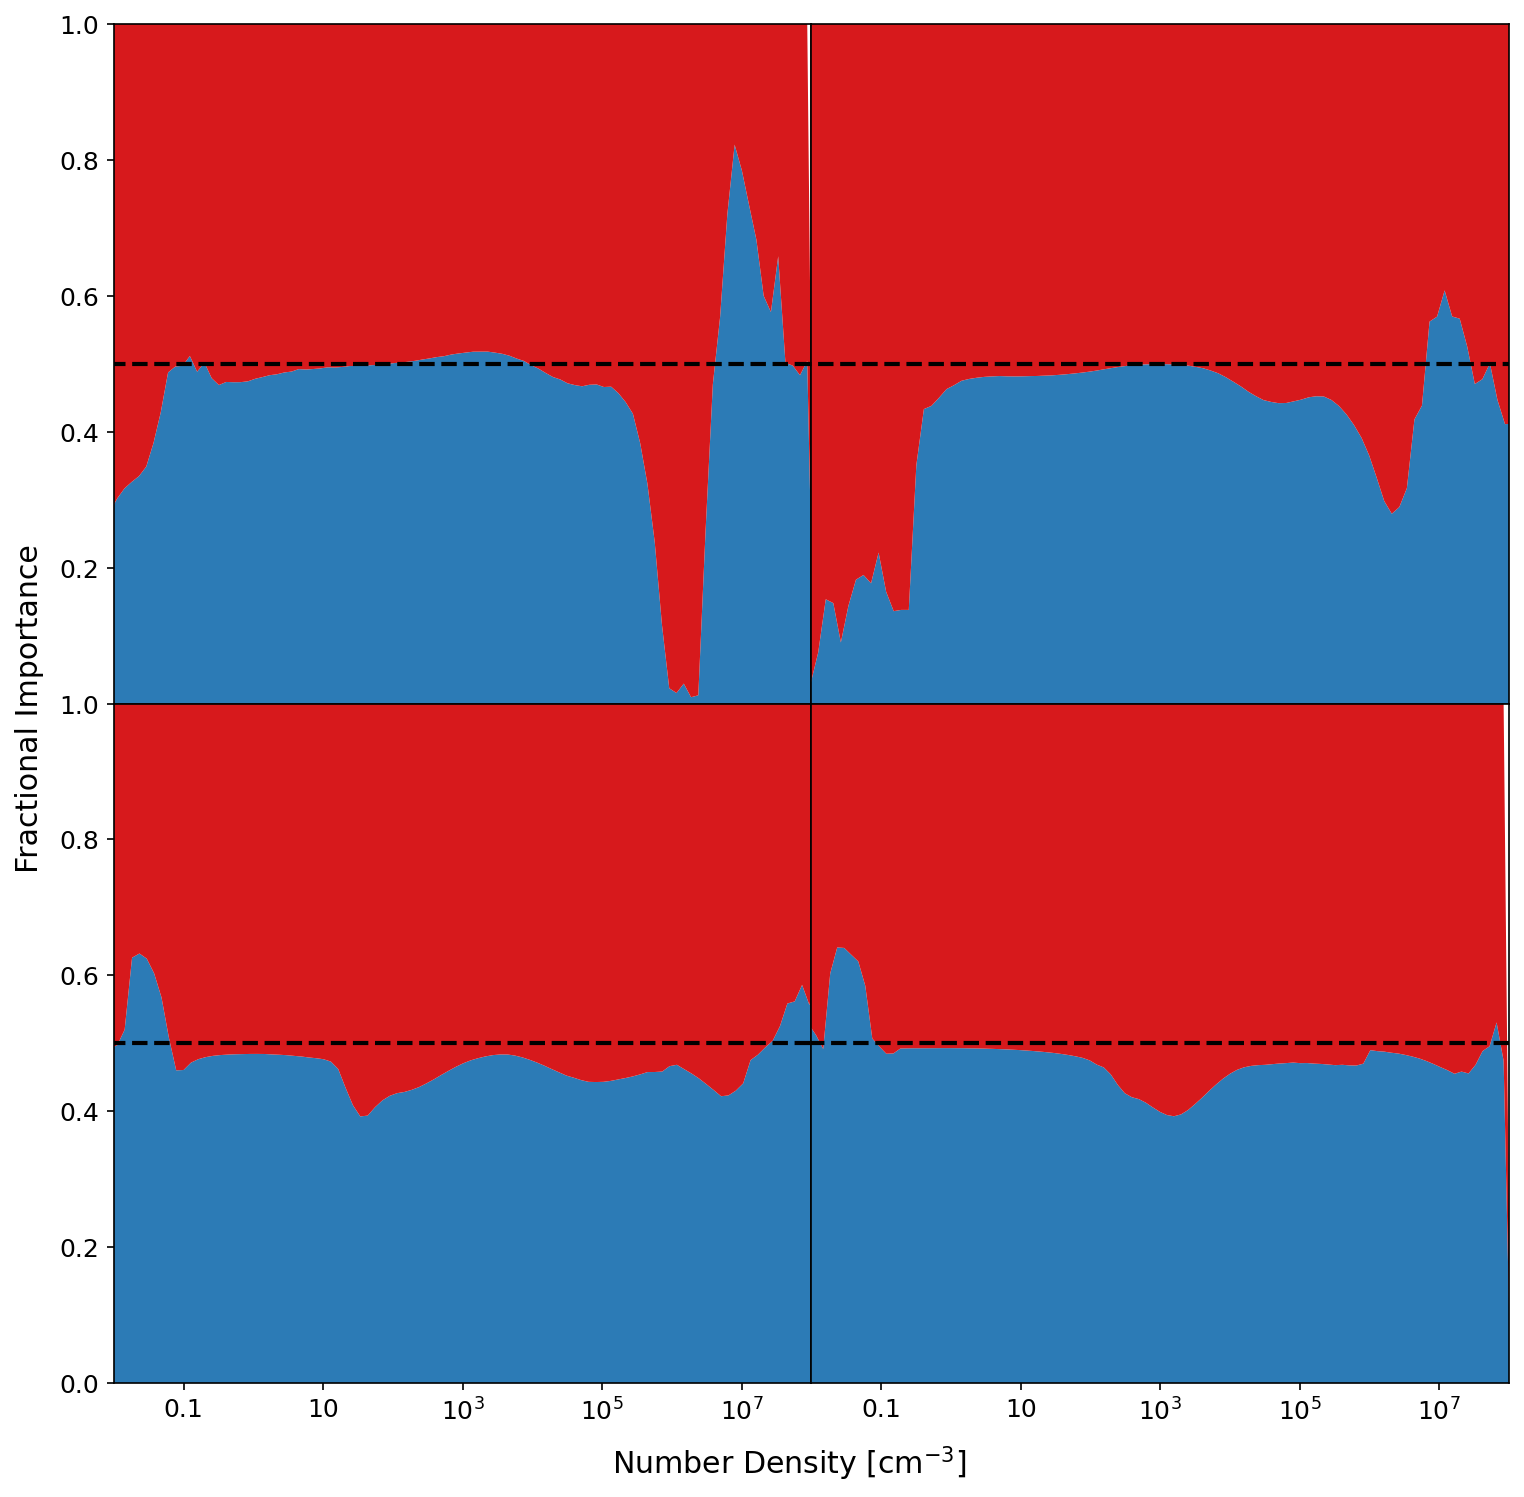

In [13]:
# Setup figure
matplotlib.rcParams['figure.dpi'] = 150
matplotlib.rcParams['font.size'] = 12.

fig, axs = plt.subplots(2,2, figsize=(12, 12), sharex=True)
fig.subplots_adjust(hspace=0, wspace=0)

data = [uv1, uv10, uv100, uv1000]
xs = [0,0,1,1]
ys = [0,1,0,1]

for i in range(4):
    b, r = heatCoolCompetition(data[i])
    a = axs[xs[i], ys[i]].stackplot(b, r, labels=["Cooling", "Heating"], colors=[c.colours()[4], c.colours()[0]])

    axs[xs[i], ys[i]].set_ylim(0,1)
    axs[xs[i], ys[i]].set_yticks([])

    axs[xs[i], ys[i]].hlines(0.5, np.min(b), np.max(b), "k", linestyle="--", linewidth=2)

# Format the figure
axs[0,0].set_xscale("log")
axs[0,0].set_xlim(1e-2, 1e8)
axs[0,0].set_ylim(0, 1)
axs[0,0].set_xticks([1e-1, 10, 1e3, 1e5, 1e7], ["0.1", "10", "$10^3$", "$10^5$", "$10^7$"])

axs[0,0].set_yticks([0.2, 0.4, 0.6, 0.8, 1])
axs[1,0].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])

fig.supxlabel("Number Density [$\\rm cm^{-3}$]", y=0.07)
fig.supylabel("Fractional Importance", x=0.07)
#fig.legend(handles=a, fontsize="small")

## Heating and Cooling Timescales

In [3]:
# Cooling times plot 
def timeScale(data):
    # Calculate the free fall time
    freeFallTimes = np.sqrt(3 * np.pi / (32 * c.G() * data.rho))

    # Calculate the thermal timescale
    coolingTimes = data.rho * data.u / np.sum(data.rates, axis=1) #+ + (5/3 - 1) * data.velocityDivergence * (36447.2682 / 1e17) * data.u * data.mass)

    # Find the ratio
    return coolingTimes / freeFallTimes

Text(0, 0.5, 'tTherm / tFF')

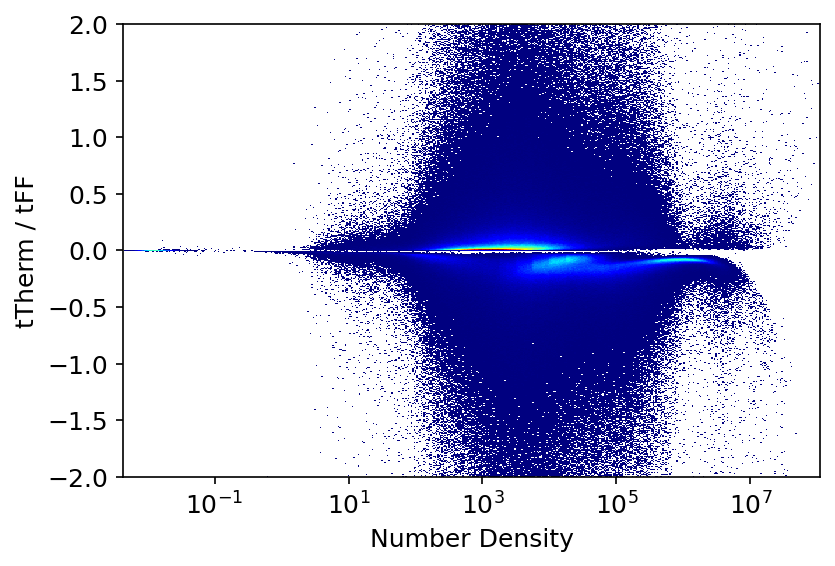

In [9]:
# Setup figure
matplotlib.rcParams['figure.dpi'] = 150
matplotlib.rcParams['font.size'] = 12.

ts = timeScale(uv1)
xBins = 10**np.linspace(np.min(np.log10(uv1.numberDensity)), np.max(np.log10(uv1.numberDensity)), 500)
yBins = np.linspace(-2, 2, 500)

plt.figure(figsize=(6,4))
h = plt.hist2d(uv1.numberDensity, ts, bins=(xBins, yBins), cmin=0.0001, cmap="jet")
#plt.hlines([-1, 0, 1], np.min(uv1.numberDensity), np.max(uv1.numberDensity), "r", alpha=0.5)
plt.xscale("log")

plt.xlabel("Number Density")
plt.ylabel("tTherm / tFF")

Text(0.02, 0.5, '$\\rm t_{Therm} / t_{Free Fall}$')

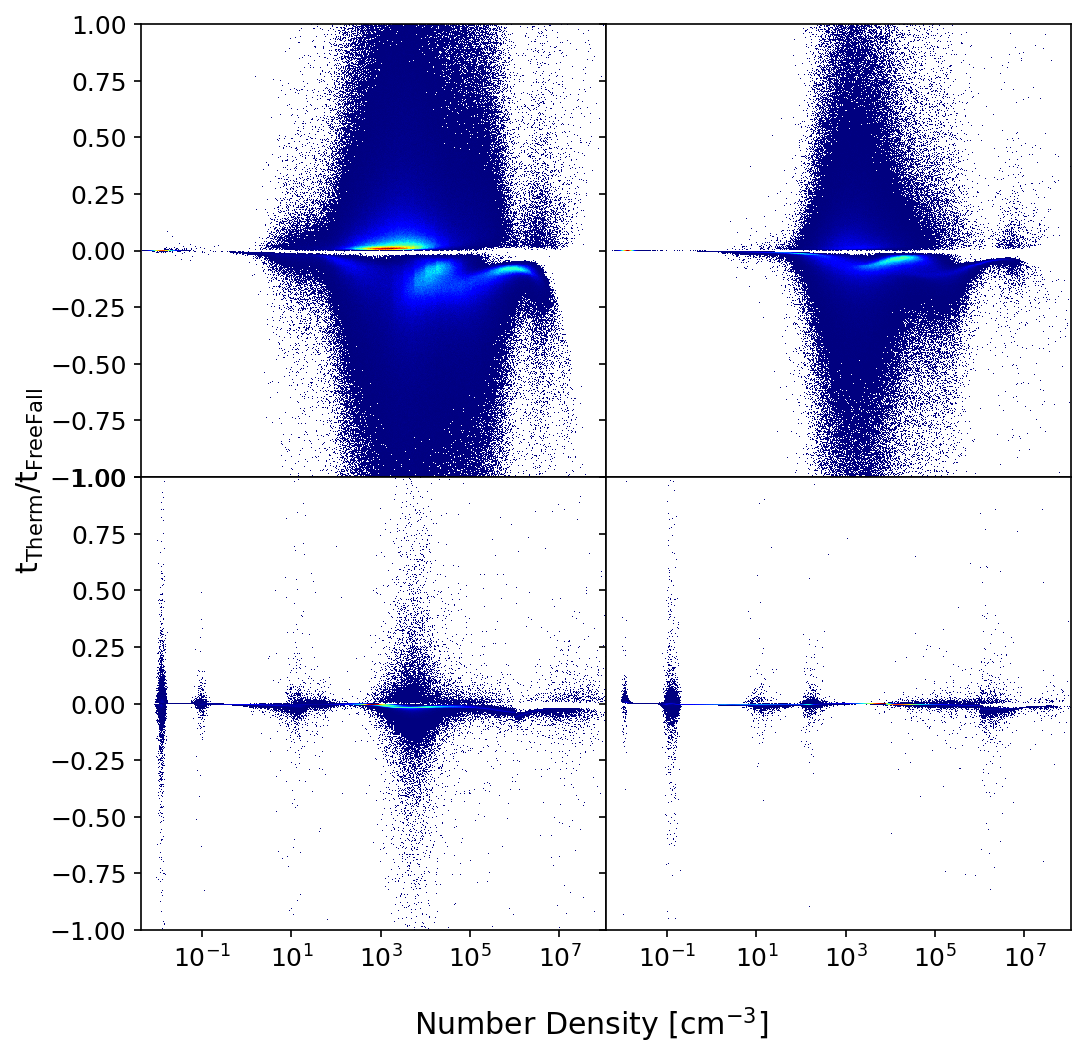

In [76]:
# Setup figure
fig, axs = plt.subplots(2,2, figsize=(8,8), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0, wspace=0)

# Work out timescales for each
ts1 = timeScale(uv1)
ts10 = timeScale(uv10)
ts100 = timeScale(uv100)
ts1000 = timeScale(uv1000)

timeScales = np.array([[ts1, ts10],[ts100, ts1000]], dtype=object)
datas = np.array([[uv1, uv10],[uv100, uv1000]], dtype=object)
cmaps = np.array([["Reds", "Oranges"], ["Greens", "Blues"]])

# Create bins for the histogram
xBins = 10**np.linspace(np.min(np.log10(uv1.numberDensity)), np.max(np.log10(uv1.numberDensity)), 500)
yBins = np.linspace(-1, 1, 500)

for i in range(2):
    for j in range(2):
        ax = axs[i, j]
        h = ax.hist2d(datas[i,j].numberDensity, timeScales[i,j], bins=(xBins, yBins), cmap="jet", cmin=0.000001)
        ax.set_xscale("log")

fig.supxlabel("Number Density $\\rm [cm^{-3}]$", y=0.03)
fig.supylabel("$\\rm t_{Therm} / t_{Free Fall}$")

In [5]:
# Work out thermal timescales for each
ts1 = uv1.rho * uv1.u / np.sum(uv1.rates, axis=1)
ts10 = uv10.rho * uv10.u / np.sum(uv10.rates, axis=1)
ts100 = uv100.rho * uv100.u / np.sum(uv100.rates, axis=1)
ts1000 = uv1000.rho * uv1000.u / np.sum(uv1000.rates, axis=1)

tff1 = np.sqrt(3 * np.pi / (32 * c.G() * uv1.rho))
tff10 = np.sqrt(3 * np.pi / (32 * c.G() * uv10.rho))
tff100 = np.sqrt(3 * np.pi / (32 * c.G() * uv100.rho))
tff1000 = np.sqrt(3 * np.pi / (32 * c.G() * uv1000.rho))

Text(0.02, 0.5, '$\\rm t_{Heat}$')

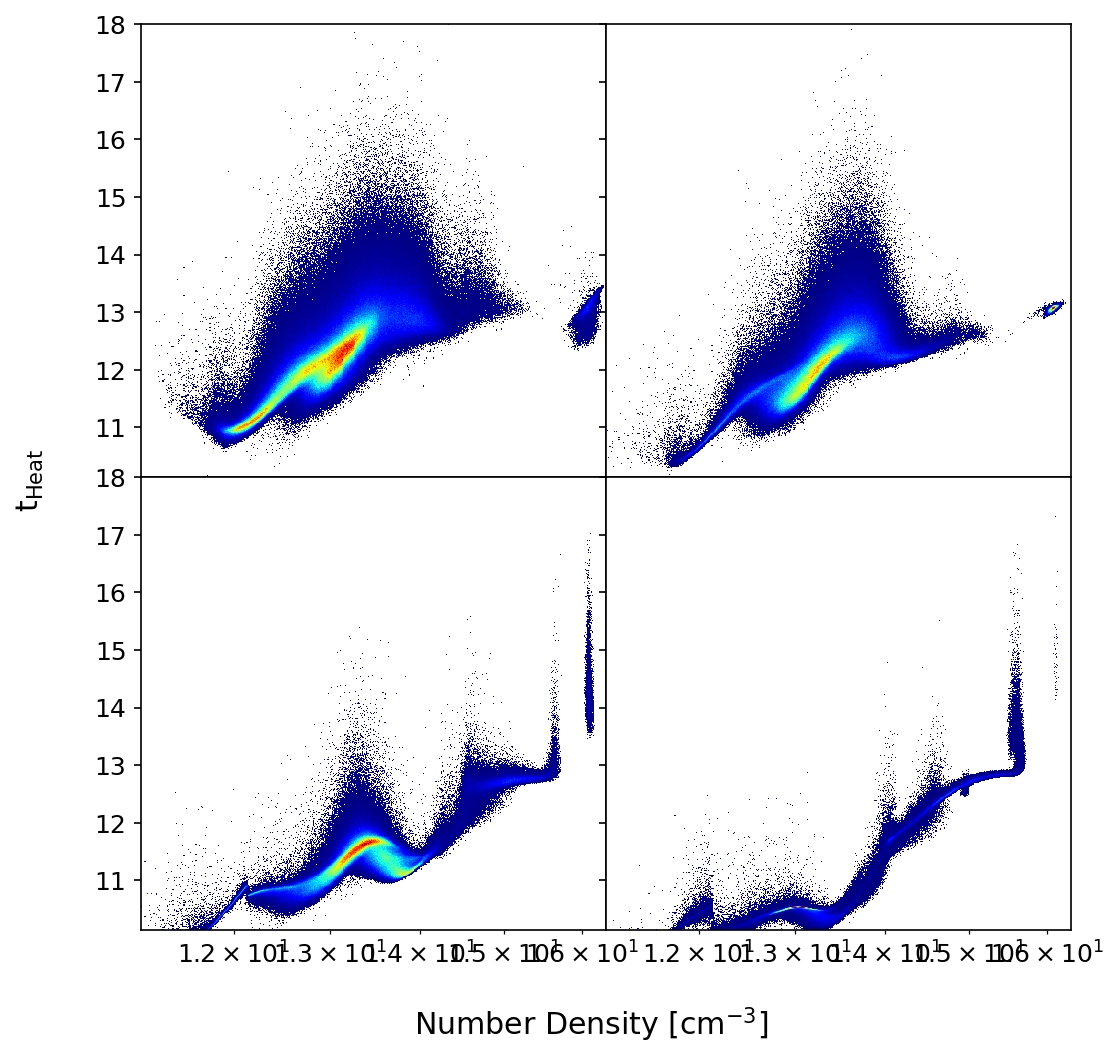

In [10]:

tHeat = ts1[ts1<0]


#plt.figure(figsize=(6,4))

#€h = plt.hist2d(uv1.numberDensity[ts1>0], -1*np.log10(ts1[ts1>0]), bins=(xBins, yBins), cmin=0.0001)
#plt.xscale("log")

# Setup figure
fig, axs = plt.subplots(2,2, figsize=(8,8), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0, wspace=0)

timeScales = np.array([[ts1, ts10],[ts100, ts1000]], dtype=object)
freeFalls = np.array([[tff1, tff10],[tff100, tff1000]], dtype=object)
datas = np.array([[uv1, uv10],[uv100, uv1000]], dtype=object)
cmaps = np.array([["Reds", "Oranges"], ["Greens", "Blues"]])

# Create bins for the histogram
#xBins = 10**np.linspace(np.min(np.log10(uv1.numberDensity)), np.max(np.log10(uv1.numberDensity)), 500)
xBins = np.linspace(np.min(np.log10(tff1)), np.max(np.log10(tff1)), 500)
yBins = np.linspace(np.log10(-1*np.max(ts1[ts1<0])), np.log10(-1*np.min(tHeat)), 500)

for i in range(2):
    for j in range(2):
        ax = axs[i, j]
        h = ax.hist2d(np.log10(freeFalls[i,j][timeScales[i,j]<0]), np.log10(-1 *timeScales[i,j][timeScales[i,j]<0]), bins=(xBins, yBins), cmap="jet", cmin=0.000001)
        #h = ax.hist2d(datas[i,j].numberDensity, np.log10(freeFalls[i,j]), bins=(xBins, yBins), cmap="Reds")
        #ax.plot(datas[i,j].numberDensity, np.log10(freeFalls[i,j]), "ro", markersize=.1, alpha=0.7)
        ax.set_xscale("log")

fig.supxlabel("Number Density $\\rm [cm^{-3}]$", y=0.03)
fig.supylabel("$\\rm t_{Heat}$")


## Params for Standalone SGChem

In [2]:
# Load snapshots containing the rates
#uv1 = readAREPO("/scratch/c.c1922522/bigClouds/postProcessing/cloudUV1_161.hdf5", 1)
#uv1.extractRates()
#uv10 = readAREPO("/scratch/c.c1922522/bigClouds/postProcessing/cloudUV10_161.hdf5", 1)
#uv10.extractRates()
#uv100 = readAREPO("/scratch/c.c1922522/bigClouds/postProcessing/cloudUV100_161.hdf5", 1)
#uv100.extractRates()
uv1000 = readAREPO("/scratch/c.c1922522/bigClouds/postProcessing/cloudUV1000_161.hdf5", 1)
uv1000.extractRates()

In [19]:
def createStandaloneICs(data):
    data.extractChemistry()

    # Create bins of density and corresponding free fall times
    bins = 10**(np.linspace(np.log10(np.min(data.numberDensity)), np.log10(np.max(data.numberDensity)), 100))
    
    # Open the file and loop through each bin
    with open("SGChem_IC.txt", "w") as f:
        for i in range(len(bins) - 1):
            # Get the properties in this bin
            inBin = np.where((data.numberDensity > bins[i]) & (data.numberDensity < bins[i+1]))
            divvel = np.abs(np.mean(data.velocityDivergence[inBin]) * (36447.2682 / 1e17))
            gasTemp = np.mean(data.gasTemp[inBin])

            # Work out the chemical abundances
            h2 = np.mean(data.H2[inBin])
            hp = np.mean(data.HI[inBin])
            cp = np.mean(data.CI[inBin])
            co = np.mean(data.CO[inBin])
            chx = np.mean(data.CHx[inBin])
            ohx = np.mean(data.OHx[inBin])
            hcop = np.mean(data.HCOI[inBin])
            hep = np.mean(data.HeI[inBin])
            mp = np.mean(data.MI[inBin])

            # Find mean molecular weight at this density
            mu = 1.4 + h2 * 2

            # Calculate the H2 shiedling level here 
            h2local = h2 * bins[i] * (np.sqrt(1.38e-16 * gasTemp * (5/3) / (mu * 1.66e-24))) / divvel

            b = np.sqrt(1.38e-16 * gasTemp / 1.66e-24)
            b5 = b / 1e5

            h2diss0 = (h2local) / 5e14
            h2diss1 = np.sqrt(1 + h2diss0)
            term1 = 0.965 / ((1 + h2diss0/b5)**2)
            term2 = 0.035 * np.exp(-8.5e-4 * h2diss1) / h2diss1
            h2shield = term1 + term2

            h2shield = np.mean(data.H2cool[inBin])
            coshield = np.mean(data.lymanAlpha[inBin])
            cshield = np.mean(data.atomicCool[inBin])


            # Calculate dust extinction
            AV = 5.348e-22 * h2local 
            Av = np.mean(data.gasGrain[inBin])

            # Calculate free fall time
            tff = 10 * np.sqrt(3 * np.pi / (32 * c.G() * bins[i] * mu * 1.66e-24))

            # Write everything out
            f.write("{:.2e} \n".format(tff))
            f.write("{:.2e} \n".format(bins[i]))
            f.write("{:.2e} \n".format(divvel))
            f.write("{:.2e} \n".format(np.mean(data.u[inBin]) * 1.99e33 / (1e17)**3))
            f.write("{:.2e} {:.2e} {:.2e} {:.2e} {:.2e} {:.2e} {:.2e} {:.2e} {:.2e} \n".format(h2, hp, cp, chx, ohx, co, hcop, hep, mp))
            f.write("{:.2e} \n".format(h2shield))
            f.write("{:.2e} \n".format(coshield))
            f.write("{:.2e} \n".format(cshield))
            f.write("{:.2e} \n".format(AV))

In [20]:
createStandaloneICs(uv1000)

In [21]:
data = np.loadtxt("SGChem_IC.txt", usecols=0)
dense = data[1::9]
h2shield = data[5::9]
av = data[8::9]

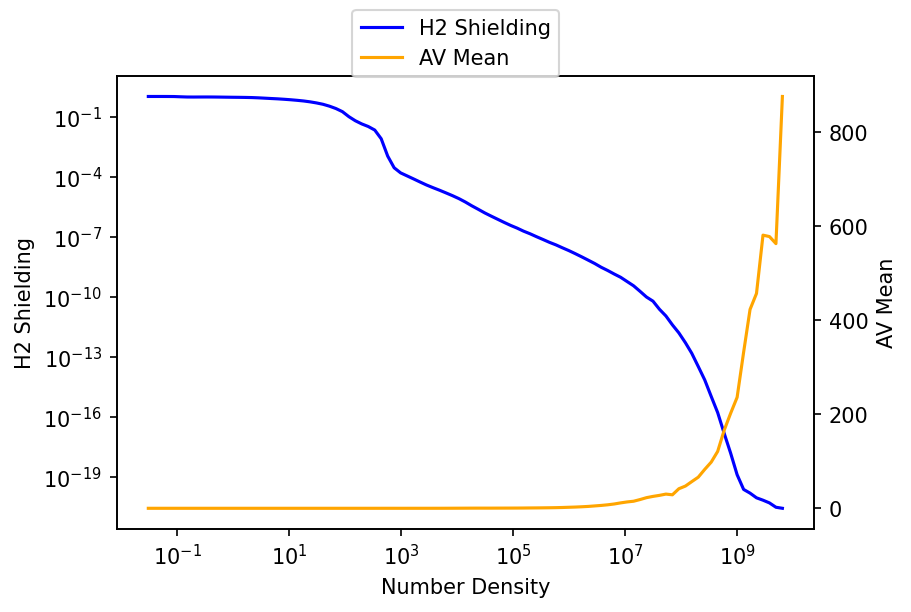

In [22]:
fig, ax = plt.subplots(1,1, figsize=(6,4))

ax.plot(dense, h2shield, "blue", label="H2 Shielding")
ax.set_xscale("log")
ax.set_yscale("log")

ax2 = ax.twinx()
ax2.plot(dense, av, "orange", label="AV Mean")

ax.set_xlabel("Number Density")
ax.set_ylabel("H2 Shielding")
ax2.set_ylabel("AV Mean")

fig.legend(loc="upper center")

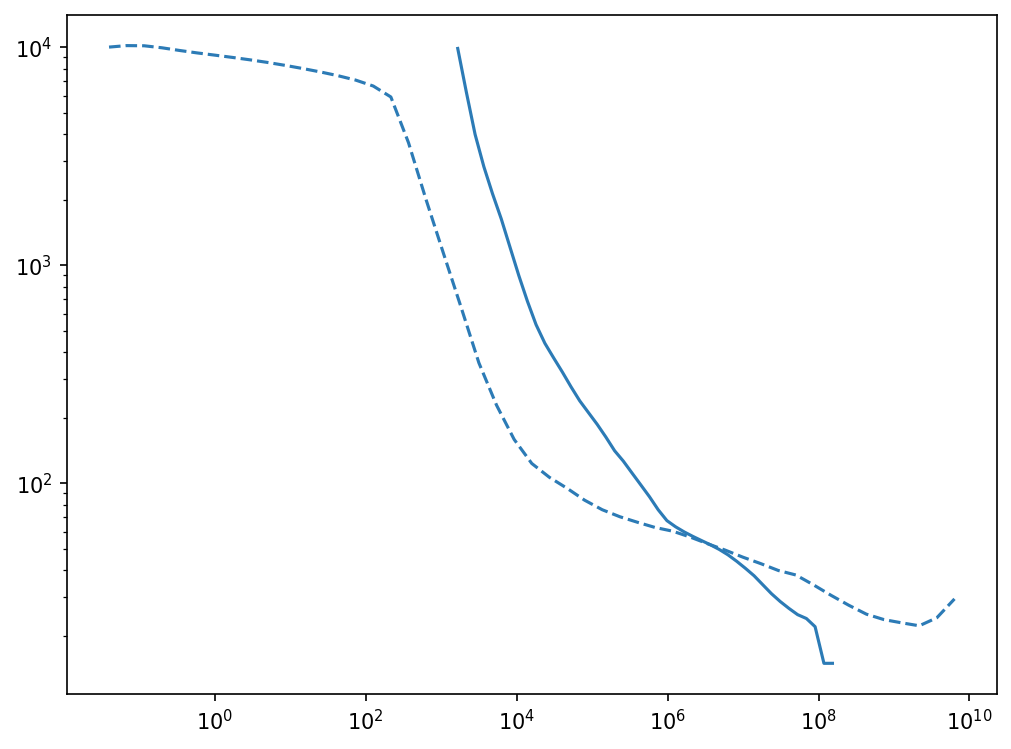

In [23]:
# Setup figure
matplotlib.rcParams['figure.dpi'] = 150

#p1, t1 = np.loadtxt("uv1temps.txt", unpack=True)
#p10, t10 = np.loadtxt("uv10temps.txt", unpack=True)
#p100, t100 = np.loadtxt("uv100temps.txt", unpack=True)
p1000, t1000 = np.loadtxt("uv1000temps.txt", unpack=True)

#p1r, t1r = binTemperatureDensity(uv1.gasTemp, uv1.numberDensity, uv1.mass, 50)
#p100r, t100r = binTemperatureDensity(uv100.gasTemp, uv100.numberDensity, uv100.mass, 50)
##p10r, t10r = binTemperatureDensity(uv10.gasTemp, uv10.numberDensity, uv10.mass, 50)
p1000r, t1000r = binTemperatureDensity(uv1000.gasTemp, uv1000.numberDensity, uv1000.mass, 50)

matplotlib.rcParams['figure.dpi'] = 150

plt.figure(figsize=(8,6))
#plt.plot(p1[t1<1e4], t1[t1<1e4], c.colours()[0])
#plt.plot(p10[t10<1e4], t10[t10<1e4], c.colours()[1])
#plt.plot(p100[t100<1e4], t100[t100<1e4], c.colours()[3])
plt.plot(p1000[t1000<1e4], t1000[t1000<1e4], c.colours()[4])

#plt.plot(10**p1r, 10**t1r, c.colours()[0], linestyle="--")
#plt.plot(10**p10r, 10**t10r, c.colours()[1], linestyle="--")
#plt.plot(10**p100r, 10**t100r, c.colours()[3], linestyle="--")
plt.plot(10**p1000r, 10**t1000r, c.colours()[4], linestyle="--")

plt.xscale("log")
plt.yscale("log")